In [1]:
# Import packages
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt

# Load and preprocess data

In [2]:
# Load datasets
df = pd.read_excel('Dokumenter\ChildrenWristFeaturesV2_TSF_new.xlsx')
df.fillna(df.mean(), inplace=True)

## With "mets" feature

In [3]:
# Initialize features and targets/labels
X = df.iloc[:, 1:32]
Y = df.iloc[:, 32]

# Binarize the output
Y = label_binarize(Y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
n_classes = Y.shape[1]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

## For plotting confusion matrix with StackingClassifier

In [ ]:
# Initialize features and targets/labels
X = df.iloc[:, 1:32]
Y = df.iloc[:, 32]

# Binarize the output
#Y = label_binarize(Y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
#n_classes = Y.shape[1]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

## Without "mets" feature

In [3]:
# Initialize features and targets/labels
X = df.iloc[:, 2:32]
Y = df.iloc[:, 32]

# Binarize the output
Y = label_binarize(Y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
n_classes = Y.shape[1]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

## For plotting confusion matrix with StackingClassifier

In [3]:
# Initialize features and targets/labels
X = df.iloc[:, 2:32]
Y = df.iloc[:, 32]

# Binarize the output
#Y = label_binarize(Y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
#n_classes = Y.shape[1]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

In [15]:
Y.shape

(136653, 11)

In [23]:
y_train.shape

(109322, 11)

In [22]:
y_test.shape

(27331, 11)

In [19]:
y_train.shape

(109322,)

In [18]:
y_test.shape

(27331,)

# Classifiers and hyperparameter tuning

# DecisionTreeClassifier

## With "mets" feature

In [4]:
# Quality of a split
criterion = ['entropy']               
# Strategy used to split at each node
splitter = ['best']                   
# Number of features to consider at every split
max_features = [31]                   
# Maximum depth
max_depth = [350]

# Dictionary to store the hyperparameters
param_grid_dt = { 'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth}

# Base model
dt = DecisionTreeClassifier(random_state=42) # random_state=42

In [5]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  33.6s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.5s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  34.2s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  36.5s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  34.8s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  36.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 31, 'splitter': 'best'}
0.77385157348393


In [30]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  14.0s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  15.3s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  15.5s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  18.9s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  15.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 31, 'splitter': 'best'}
0.7729276987340992


# Second run (final) 

In [5]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  14.1s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.7s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.5s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.2s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 31, 'splitter': 'best'}
0.7734033317745214


In [6]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.5s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.6s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.6s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  12.8s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  13.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 31, 'splitter': 'best'}
0.7734033317745214


# Second run (final) ROC/AUC purpose

In [11]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  32.3s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.2s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  31.9s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  37.2s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  32.9s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  34.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 31, 'splitter': 'best'}
0.7732752723967525


In [5]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  34.1s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  32.1s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  32.9s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  35.5s
[CV] criterion=entropy, max_depth=350, max_features=31, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=31, splitter=best, total=  33.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 31, 'splitter': 'best'}
0.7732752723967525


# Feature selection

Feature: 0, Score: 0.28167
Feature: 1, Score: 0.03611
Feature: 2, Score: 0.02625
Feature: 3, Score: 0.03446
Feature: 4, Score: 0.02060
Feature: 5, Score: 0.01824
Feature: 6, Score: 0.01865
Feature: 7, Score: 0.01694
Feature: 8, Score: 0.04487
Feature: 9, Score: 0.03759
Feature: 10, Score: 0.02577
Feature: 11, Score: 0.11090
Feature: 12, Score: 0.03366
Feature: 13, Score: 0.00554
Feature: 14, Score: 0.02809
Feature: 15, Score: 0.02361
Feature: 16, Score: 0.00732
Feature: 17, Score: 0.02990
Feature: 18, Score: 0.01405
Feature: 19, Score: 0.01036
Feature: 20, Score: 0.01847
Feature: 21, Score: 0.01602
Feature: 22, Score: 0.02856
Feature: 23, Score: 0.00447
Feature: 24, Score: 0.01102
Feature: 25, Score: 0.01298
Feature: 26, Score: 0.02640
Feature: 27, Score: 0.00956
Feature: 28, Score: 0.01351
Feature: 29, Score: 0.01588
Feature: 30, Score: 0.01856


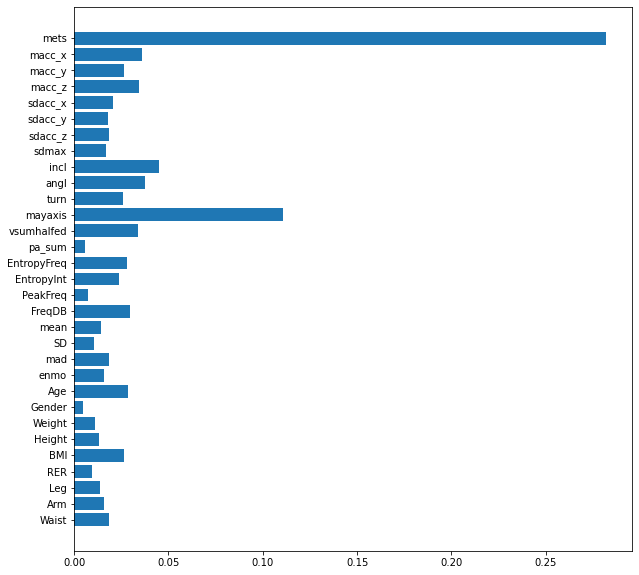

In [8]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), dt_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

Feature: 0, Score: 0.32802
Feature: 1, Score: 0.03614
Feature: 2, Score: 0.01942
Feature: 3, Score: 0.03467
Feature: 4, Score: 0.01965
Feature: 5, Score: 0.01525
Feature: 6, Score: 0.01586
Feature: 7, Score: 0.01404
Feature: 8, Score: 0.03443
Feature: 9, Score: 0.03446
Feature: 10, Score: 0.02214
Feature: 11, Score: 0.10270
Feature: 12, Score: 0.03310
Feature: 13, Score: 0.02166
Feature: 14, Score: 0.02866
Feature: 15, Score: 0.02544
Feature: 16, Score: 0.00616
Feature: 17, Score: 0.03204
Feature: 18, Score: 0.01230
Feature: 19, Score: 0.00719
Feature: 20, Score: 0.00404
Feature: 21, Score: 0.00955
Feature: 22, Score: 0.03256
Feature: 23, Score: 0.00517
Feature: 24, Score: 0.00990
Feature: 25, Score: 0.01230
Feature: 26, Score: 0.02691
Feature: 27, Score: 0.00963
Feature: 28, Score: 0.01278
Feature: 29, Score: 0.01485
Feature: 30, Score: 0.01897


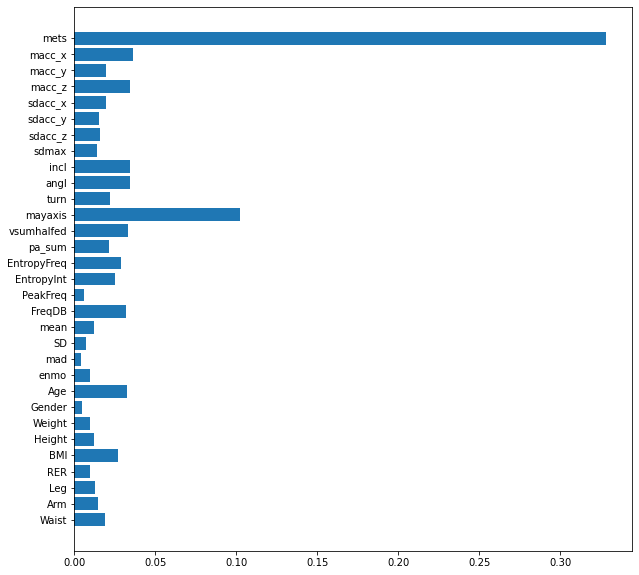

In [31]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), dt_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Second run (final) 

Feature: 0, Score: 0.32864
Feature: 1, Score: 0.03523
Feature: 2, Score: 0.01987
Feature: 3, Score: 0.03465
Feature: 4, Score: 0.01969
Feature: 5, Score: 0.01478
Feature: 6, Score: 0.01554
Feature: 7, Score: 0.01363
Feature: 8, Score: 0.03649
Feature: 9, Score: 0.03338
Feature: 10, Score: 0.02151
Feature: 11, Score: 0.10227
Feature: 12, Score: 0.03285
Feature: 13, Score: 0.00441
Feature: 14, Score: 0.02892
Feature: 15, Score: 0.02571
Feature: 16, Score: 0.00606
Feature: 17, Score: 0.03197
Feature: 18, Score: 0.00952
Feature: 19, Score: 0.00656
Feature: 20, Score: 0.02173
Feature: 21, Score: 0.01295
Feature: 22, Score: 0.03279
Feature: 23, Score: 0.00520
Feature: 24, Score: 0.00997
Feature: 25, Score: 0.01400
Feature: 26, Score: 0.02518
Feature: 27, Score: 0.00893
Feature: 28, Score: 0.01345
Feature: 29, Score: 0.01514
Feature: 30, Score: 0.01896


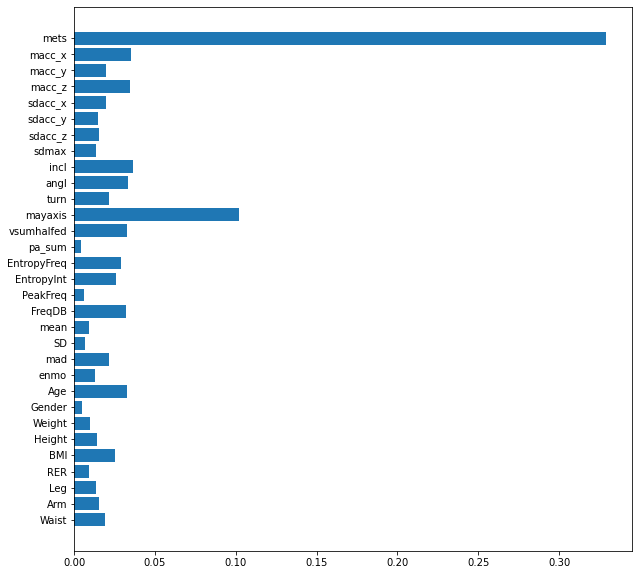

In [7]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), dt_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Second run (final) ROC/AUC purpose

Feature: 0, Score: 0.28114
Feature: 1, Score: 0.03662
Feature: 2, Score: 0.02595
Feature: 3, Score: 0.03744
Feature: 4, Score: 0.02073
Feature: 5, Score: 0.01817
Feature: 6, Score: 0.01936
Feature: 7, Score: 0.01709
Feature: 8, Score: 0.04459
Feature: 9, Score: 0.03637
Feature: 10, Score: 0.02562
Feature: 11, Score: 0.10985
Feature: 12, Score: 0.03501
Feature: 13, Score: 0.01096
Feature: 14, Score: 0.02789
Feature: 15, Score: 0.02398
Feature: 16, Score: 0.00753
Feature: 17, Score: 0.02956
Feature: 18, Score: 0.01582
Feature: 19, Score: 0.00977
Feature: 20, Score: 0.01372
Feature: 21, Score: 0.01225
Feature: 22, Score: 0.02640
Feature: 23, Score: 0.00454
Feature: 24, Score: 0.01092
Feature: 25, Score: 0.01470
Feature: 26, Score: 0.02483
Feature: 27, Score: 0.00900
Feature: 28, Score: 0.01502
Feature: 29, Score: 0.01692
Feature: 30, Score: 0.01825


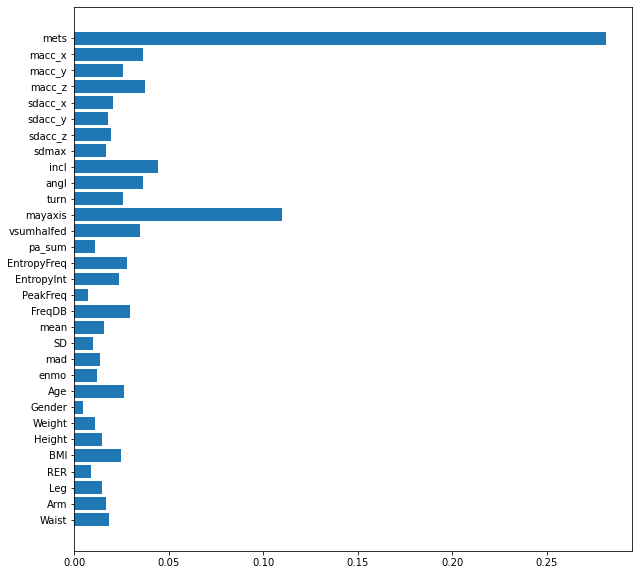

In [61]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), dt_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

Feature: 0, Score: 0.28114
Feature: 1, Score: 0.03662
Feature: 2, Score: 0.02595
Feature: 3, Score: 0.03744
Feature: 4, Score: 0.02073
Feature: 5, Score: 0.01817
Feature: 6, Score: 0.01936
Feature: 7, Score: 0.01709
Feature: 8, Score: 0.04459
Feature: 9, Score: 0.03637
Feature: 10, Score: 0.02562
Feature: 11, Score: 0.10985
Feature: 12, Score: 0.03501
Feature: 13, Score: 0.01096
Feature: 14, Score: 0.02789
Feature: 15, Score: 0.02398
Feature: 16, Score: 0.00753
Feature: 17, Score: 0.02956
Feature: 18, Score: 0.01582
Feature: 19, Score: 0.00977
Feature: 20, Score: 0.01372
Feature: 21, Score: 0.01225
Feature: 22, Score: 0.02640
Feature: 23, Score: 0.00454
Feature: 24, Score: 0.01092
Feature: 25, Score: 0.01470
Feature: 26, Score: 0.02483
Feature: 27, Score: 0.00900
Feature: 28, Score: 0.01502
Feature: 29, Score: 0.01692
Feature: 30, Score: 0.01825


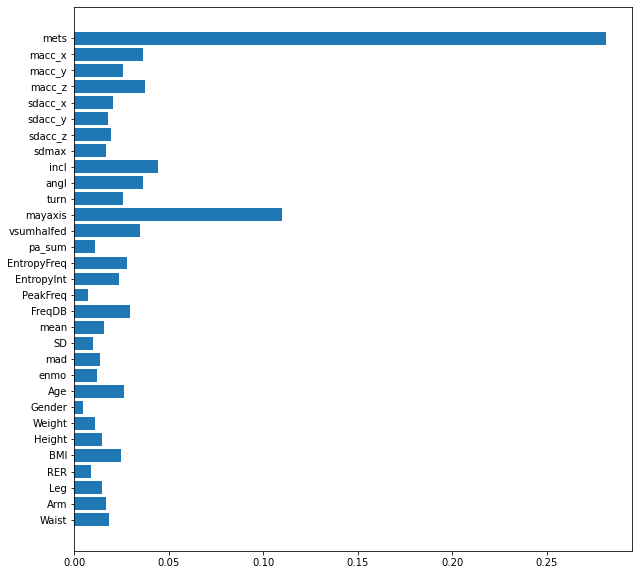

In [6]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), dt_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# ROC/AUC purpose

In [9]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.025]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_features=13, max_depth=350))
dt_y_score = dt_classifier.fit(X_train_new_dt, y_train_new_dt).predict_proba(X_test_new_dt)

In [34]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.02]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_features=14, max_depth=350))
dt_y_score = dt_classifier.fit(X_train_new_dt, y_train_new_dt).predict_proba(X_test_new_dt)

dt_brah = dt_classifier.fit(X_train_new_dt, y_train_new_dt)
print(dt_brah.score(X_train_new_dt, y_train_new_dt))
print(dt_brah.score(X_test_new_dt, y_test_new_dt))

auc_tr = roc_auc_score(y_train_new_dt, dt_brah.predict_proba(X_train_new_dt), average='macro', multi_class='ovr')
auc_ts = roc_auc_score(y_test_new_dt, dt_brah.predict_proba(X_test_new_dt), average='macro', multi_class='ovr')

print(auc_tr)
print(auc_ts)

1.0
0.6854121693315283
1.0
0.8716398862100394


# Second run (final)

In [21]:
# Retrain with feature selection
df_features = df.iloc[:, 1:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.015]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_stack = DecisionTreeClassifier(criterion='entropy', max_features=19, max_depth=350, random_state=42)
dt_stack.fit(X_train_new_dt, y_train_new_dt)
print("Train accuracy: ", dt_stack.score(X_train_new_dt, y_train_new_dt))
print("Test accuracy: ", dt_stack.score(X_test_new_dt, y_test_new_dt))

Train accuracy:  1.0
Test accuracy:  0.8042515824521606


# Second run (final) ROC/AUC purpose

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.02]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_features=15, max_depth=350, random_state=42))
dt_y_score = dt_classifier.fit(X_train_new_dt, y_train_new_dt).predict_proba(X_test_new_dt)

In [65]:
from sklearn.metrics import roc_auc_score
pred_train_dt = dt_classifier.predict(X_train_new_dt)
pred_test_dt = dt_classifier.predict(X_test_new_dt)
print("Train accuracy: ", dt_classifier.score(X_train_new_dt, y_train_new_dt))
print("Test accuracy: ", dt_classifier.score(X_test_new_dt, y_test_new_dt))

auc_tr_dt = roc_auc_score(y_train_new_dt, dt_classifier.predict_proba(X_train_new_dt), average='macro', multi_class='ovr')
auc_ts_dt = roc_auc_score(y_test_new_dt, dt_classifier.predict_proba(X_test_new_dt), average='macro', multi_class='ovr')

print("Train AUC score: ", auc_tr_dt)
print("Test AUC score: ", auc_ts_dt)

Train accuracy:  1.0
Test accuracy:  0.6827777981047163
Train AUC score:  1.0
Test AUC score:  0.8724137284801994


## Without "mets" feature

In [37]:
# Quality of a split
criterion = ['entropy']               
# Strategy used to split at each node
splitter = ['best']                   
# Number of features to consider at every split
max_features = [30]                   
# Maximum depth
max_depth = [350]

# Dictionary to store the hyperparameters
param_grid_dt = { 'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth}

# Base model
dt = DecisionTreeClassifier(random_state=42) # random_state=42

In [7]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  39.8s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  36.4s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  37.5s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  37.1s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  37.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 30, 'splitter': 'best'}
0.6350872039439032


Feature: 0, Score: 0.05609
Feature: 1, Score: 0.03607
Feature: 2, Score: 0.04257
Feature: 3, Score: 0.04127
Feature: 4, Score: 0.02900
Feature: 5, Score: 0.03492
Feature: 6, Score: 0.05247
Feature: 7, Score: 0.05094
Feature: 8, Score: 0.04224
Feature: 9, Score: 0.03422
Feature: 10, Score: 0.12125
Feature: 11, Score: 0.04704
Feature: 12, Score: 0.01094
Feature: 13, Score: 0.02355
Feature: 14, Score: 0.04525
Feature: 15, Score: 0.01508
Feature: 16, Score: 0.03165
Feature: 17, Score: 0.02160
Feature: 18, Score: 0.01706
Feature: 19, Score: 0.10987
Feature: 20, Score: 0.01993
Feature: 21, Score: 0.02409
Feature: 22, Score: 0.00490
Feature: 23, Score: 0.00858
Feature: 24, Score: 0.01305
Feature: 25, Score: 0.01948
Feature: 26, Score: 0.01164
Feature: 27, Score: 0.01207
Feature: 28, Score: 0.01057
Feature: 29, Score: 0.01260


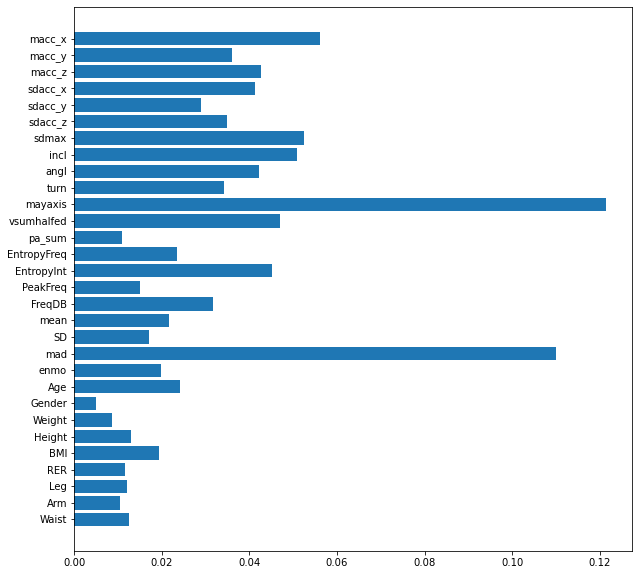

In [9]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), dt_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 2:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.02]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_features=18, max_depth=350, random_state=42))
dt_y_score = dt_classifier.fit(X_train_new_dt, y_train_new_dt).predict_proba(X_test_new_dt)

## For plotting confusion matrix with StackingClassifier

In [4]:
# Quality of a split
criterion = ['entropy']               
# Strategy used to split at each node
splitter = ['best']                   
# Number of features to consider at every split
max_features = [30]                   
# Maximum depth
max_depth = [350]

# Dictionary to store the hyperparameters
param_grid_dt = { 'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth}

# Base model
dt = DecisionTreeClassifier(random_state=42) # random_state=42

In [5]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  16.2s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.1s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  18.1s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  15.3s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  17.1s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  17.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 30, 'splitter': 'best'}
0.6333400183191789


Feature: 0, Score: 0.04626
Feature: 1, Score: 0.02887
Feature: 2, Score: 0.04166
Feature: 3, Score: 0.04283
Feature: 4, Score: 0.02518
Feature: 5, Score: 0.03288
Feature: 6, Score: 0.05758
Feature: 7, Score: 0.04592
Feature: 8, Score: 0.04105
Feature: 9, Score: 0.03341
Feature: 10, Score: 0.11322
Feature: 11, Score: 0.04455
Feature: 12, Score: 0.00856
Feature: 13, Score: 0.02555
Feature: 14, Score: 0.04800
Feature: 15, Score: 0.01381
Feature: 16, Score: 0.03013
Feature: 17, Score: 0.01685
Feature: 18, Score: 0.01609
Feature: 19, Score: 0.14510
Feature: 20, Score: 0.02150
Feature: 21, Score: 0.03201
Feature: 22, Score: 0.00332
Feature: 23, Score: 0.01021
Feature: 24, Score: 0.01271
Feature: 25, Score: 0.01826
Feature: 26, Score: 0.01031
Feature: 27, Score: 0.01198
Feature: 28, Score: 0.01033
Feature: 29, Score: 0.01190


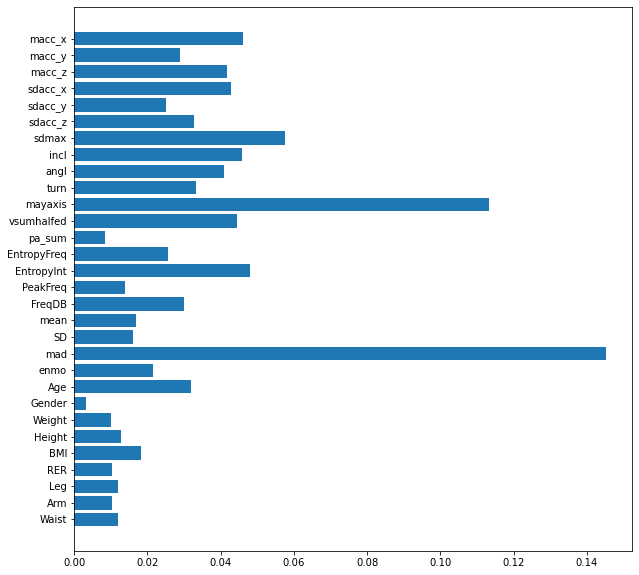

In [6]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), dt_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [7]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.015]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_stack = DecisionTreeClassifier(criterion='entropy', max_features=21, max_depth=350, random_state=42)
dt_stack.fit(X_train_new_dt, y_train_new_dt)
print("Train accuracy: ", dt_stack.score(X_train_new_dt, y_train_new_dt))
print("Test accuracy: ", dt_stack.score(X_test_new_dt, y_test_new_dt))

Train accuracy:  1.0
Test accuracy:  0.6410669203468589


# K-NearestNeighborClassifier

## With "mets" feature

In [42]:
X_train_new_knn, X_test_new_knn, y_train_new_knn, y_test_new_knn = train_test_split(X, Y, test_size=0.2, random_state=42)

# Learn to predict each class against the other
knn_classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')) # random_state=42
knn_y_score = knn_classifier.fit(X_train, y_train).predict_proba(X_test)

In [44]:
y_train_new_knn.shape

(109322, 11)

In [45]:
y_train.shape

(109322,)

In [46]:
y_test.shape

(27331,)

In [48]:
y_test_new_knn.shape

(27331, 11)

# Second run (final)

In [23]:
knn_stack = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')
knn_stack.fit(X_train, y_train)
print("Train accuracy: ", knn_stack.score(X_train, y_train))
print("Test accuracy: ", knn_stack.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.7416120888368519


# Second run (final) ROC/AUC purpose

In [8]:
# random_state=42 --> DOES NOT WORK IN KNN (Not necessary either)
X_train_new_knn, X_test_new_knn, y_train_new_knn, y_test_new_knn = train_test_split(X, Y, test_size=0.2, random_state=42)

# Learn to predict each class against the other
knn_classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')) 
knn_y_score = knn_classifier.fit(X_train_new_knn, y_train_new_knn).predict_proba(X_test_new_knn)

## Without "mets" feature

In [13]:
# random_state=42 --> DOES NOT WORK IN KNN (Not necessary either)
X_train_new_knn, X_test_new_knn, y_train_new_knn, y_test_new_knn = train_test_split(X, Y, test_size=0.2, random_state=42)

# Learn to predict each class against the other
knn_classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')) 
knn_y_score = knn_classifier.fit(X_train_new_knn, y_train_new_knn).predict_proba(X_test_new_knn)

## For plotting confusion matrix with StackingClassifier

In [9]:
knn_stack = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')
knn_stack.fit(X_train, y_train)
print("Train accuracy: ", knn_stack.score(X_train, y_train))
print("Test accuracy: ", knn_stack.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.6787530642859756


# RandomForestClassifier

## With "mets" feature

In [9]:
# Number of trees
n_estimators = [50]         #490 too long to compute
# Number of features to consider at every split
max_features = [22]

# Dictionary to store the hyperparameters
param_grid_rf = { 'n_estimators': n_estimators,
                  'max_features': max_features}

# Base model
rf = RandomForestClassifier(random_state=42)                 # random_state=42

In [8]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_features=22, n_estimators=50, total= 4.1min
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s


[CV] ................. max_features=22, n_estimators=50, total= 4.1min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 4.0min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 4.1min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 4.1min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.4min finished


{'max_features': 22, 'n_estimators': 50}
0.7734673706673414


In [37]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_features=22, n_estimators=50, total= 1.9min
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] ................. max_features=22, n_estimators=50, total= 1.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 1.7min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 1.7min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 1.7min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.9min finished


{'max_features': 22, 'n_estimators': 50}
0.8540641174609622


# Second run (final)

In [15]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=22, n_estimators=490 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ max_features=22, n_estimators=490, total=17.5min
[CV] max_features=22, n_estimators=490 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.5min remaining:    0.0s


[CV] ................ max_features=22, n_estimators=490, total=17.6min
[CV] max_features=22, n_estimators=490 ...............................
[CV] ................ max_features=22, n_estimators=490, total=16.8min
[CV] max_features=22, n_estimators=490 ...............................
[CV] ................ max_features=22, n_estimators=490, total=17.0min
[CV] max_features=22, n_estimators=490 ...............................
[CV] ................ max_features=22, n_estimators=490, total=17.2min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 86.0min finished


{'max_features': 22, 'n_estimators': 490}
0.8613179387468038


# Second run (final) ROC/AUC purpose

In [75]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.9min
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV] ................. max_features=22, n_estimators=50, total= 3.7min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.7min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.8min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.9min finished


{'max_features': 22, 'n_estimators': 50}
0.7762298436945801


In [10]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_features=22, n_estimators=50, total= 3.8min
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.8min remaining:    0.0s


[CV] ................. max_features=22, n_estimators=50, total= 3.9min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 4.0min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 4.0min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.8min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 19.5min finished


{'max_features': 22, 'n_estimators': 50}
0.7762298436945801


# Feature selection

Feature: 0, Score: 0.17157
Feature: 1, Score: 0.04520
Feature: 2, Score: 0.03423
Feature: 3, Score: 0.04447
Feature: 4, Score: 0.02617
Feature: 5, Score: 0.02277
Feature: 6, Score: 0.02432
Feature: 7, Score: 0.02364
Feature: 8, Score: 0.05063
Feature: 9, Score: 0.04402
Feature: 10, Score: 0.03564
Feature: 11, Score: 0.09805
Feature: 12, Score: 0.04004
Feature: 13, Score: 0.01880
Feature: 14, Score: 0.02997
Feature: 15, Score: 0.03261
Feature: 16, Score: 0.01023
Feature: 17, Score: 0.02498
Feature: 18, Score: 0.02209
Feature: 19, Score: 0.01396
Feature: 20, Score: 0.02025
Feature: 21, Score: 0.02281
Feature: 22, Score: 0.02503
Feature: 23, Score: 0.00480
Feature: 24, Score: 0.01198
Feature: 25, Score: 0.01554
Feature: 26, Score: 0.02471
Feature: 27, Score: 0.01202
Feature: 28, Score: 0.01454
Feature: 29, Score: 0.01408
Feature: 30, Score: 0.02084


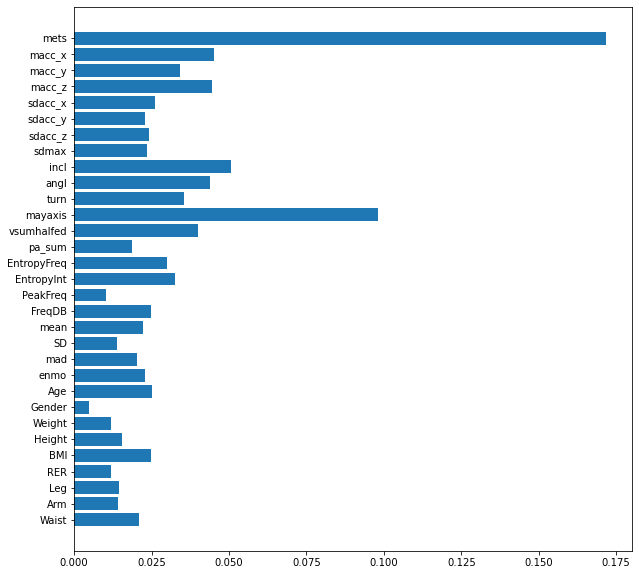

In [9]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), rf_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

Feature: 0, Score: 0.17216
Feature: 1, Score: 0.04600
Feature: 2, Score: 0.03303
Feature: 3, Score: 0.04490
Feature: 4, Score: 0.02754
Feature: 5, Score: 0.02246
Feature: 6, Score: 0.02448
Feature: 7, Score: 0.02333
Feature: 8, Score: 0.05081
Feature: 9, Score: 0.04356
Feature: 10, Score: 0.03460
Feature: 11, Score: 0.09936
Feature: 12, Score: 0.04023
Feature: 13, Score: 0.01698
Feature: 14, Score: 0.03079
Feature: 15, Score: 0.03206
Feature: 16, Score: 0.01006
Feature: 17, Score: 0.02488
Feature: 18, Score: 0.02280
Feature: 19, Score: 0.01633
Feature: 20, Score: 0.01710
Feature: 21, Score: 0.02155
Feature: 22, Score: 0.02500
Feature: 23, Score: 0.00504
Feature: 24, Score: 0.01215
Feature: 25, Score: 0.01637
Feature: 26, Score: 0.02547
Feature: 27, Score: 0.01187
Feature: 28, Score: 0.01456
Feature: 29, Score: 0.01420
Feature: 30, Score: 0.02034


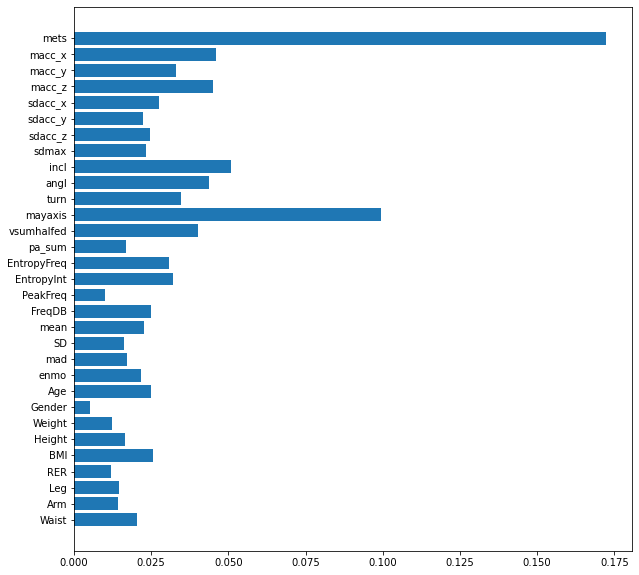

In [38]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), rf_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Second run (final)

Feature: 0, Score: 0.17006
Feature: 1, Score: 0.04584
Feature: 2, Score: 0.03372
Feature: 3, Score: 0.04522
Feature: 4, Score: 0.02739
Feature: 5, Score: 0.02256
Feature: 6, Score: 0.02446
Feature: 7, Score: 0.02167
Feature: 8, Score: 0.05018
Feature: 9, Score: 0.04368
Feature: 10, Score: 0.03462
Feature: 11, Score: 0.09904
Feature: 12, Score: 0.04009
Feature: 13, Score: 0.02090
Feature: 14, Score: 0.03163
Feature: 15, Score: 0.03152
Feature: 16, Score: 0.00995
Feature: 17, Score: 0.02562
Feature: 18, Score: 0.02231
Feature: 19, Score: 0.01400
Feature: 20, Score: 0.01942
Feature: 21, Score: 0.02229
Feature: 22, Score: 0.02515
Feature: 23, Score: 0.00499
Feature: 24, Score: 0.01191
Feature: 25, Score: 0.01583
Feature: 26, Score: 0.02452
Feature: 27, Score: 0.01207
Feature: 28, Score: 0.01459
Feature: 29, Score: 0.01405
Feature: 30, Score: 0.02070


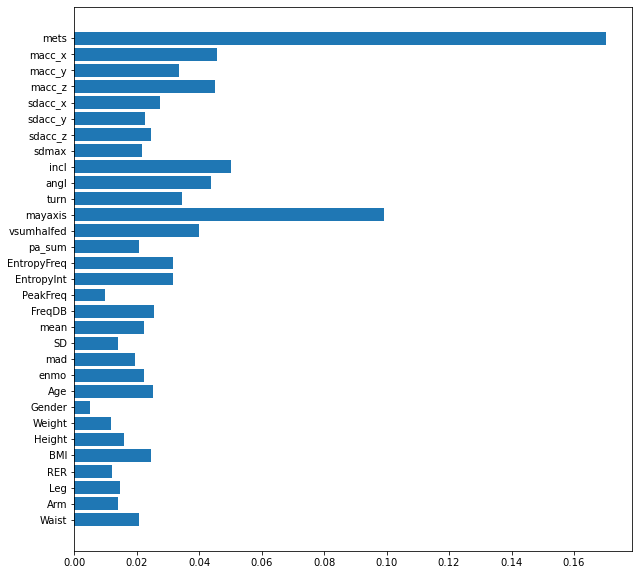

In [16]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), rf_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Second run (final) ROC/AUC purpose

Feature: 0, Score: 0.16916
Feature: 1, Score: 0.04585
Feature: 2, Score: 0.03378
Feature: 3, Score: 0.04519
Feature: 4, Score: 0.02683
Feature: 5, Score: 0.02236
Feature: 6, Score: 0.02412
Feature: 7, Score: 0.02239
Feature: 8, Score: 0.05015
Feature: 9, Score: 0.04444
Feature: 10, Score: 0.03479
Feature: 11, Score: 0.09990
Feature: 12, Score: 0.04021
Feature: 13, Score: 0.02064
Feature: 14, Score: 0.03126
Feature: 15, Score: 0.03004
Feature: 16, Score: 0.01005
Feature: 17, Score: 0.02625
Feature: 18, Score: 0.02259
Feature: 19, Score: 0.01370
Feature: 20, Score: 0.02016
Feature: 21, Score: 0.02219
Feature: 22, Score: 0.02572
Feature: 23, Score: 0.00486
Feature: 24, Score: 0.01213
Feature: 25, Score: 0.01578
Feature: 26, Score: 0.02470
Feature: 27, Score: 0.01237
Feature: 28, Score: 0.01436
Feature: 29, Score: 0.01377
Feature: 30, Score: 0.02028


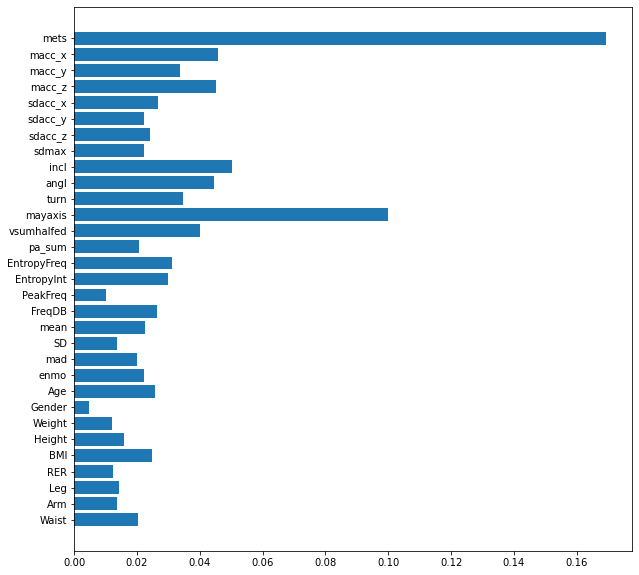

In [76]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), rf_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

Feature: 0, Score: 0.16916
Feature: 1, Score: 0.04585
Feature: 2, Score: 0.03378
Feature: 3, Score: 0.04519
Feature: 4, Score: 0.02683
Feature: 5, Score: 0.02236
Feature: 6, Score: 0.02412
Feature: 7, Score: 0.02239
Feature: 8, Score: 0.05015
Feature: 9, Score: 0.04444
Feature: 10, Score: 0.03479
Feature: 11, Score: 0.09990
Feature: 12, Score: 0.04021
Feature: 13, Score: 0.02064
Feature: 14, Score: 0.03126
Feature: 15, Score: 0.03004
Feature: 16, Score: 0.01005
Feature: 17, Score: 0.02625
Feature: 18, Score: 0.02259
Feature: 19, Score: 0.01370
Feature: 20, Score: 0.02016
Feature: 21, Score: 0.02219
Feature: 22, Score: 0.02572
Feature: 23, Score: 0.00486
Feature: 24, Score: 0.01213
Feature: 25, Score: 0.01578
Feature: 26, Score: 0.02470
Feature: 27, Score: 0.01237
Feature: 28, Score: 0.01436
Feature: 29, Score: 0.01377
Feature: 30, Score: 0.02028


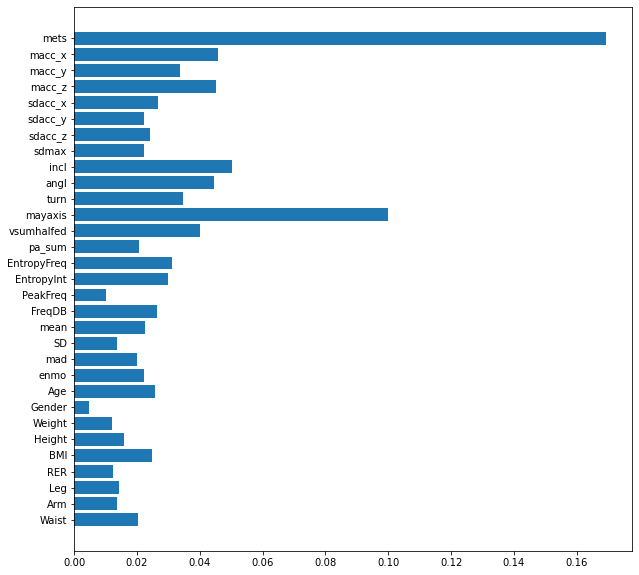

In [11]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), rf_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# ROC/AUC purpose

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_features=2))
rf_y_score = rf_classifier.fit(X_train_new_rf, y_train_new_rf).predict_proba(X_test_new_rf)

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_features=21))
rf_y_score = rf_classifier.fit(X_train_new_rf, y_train_new_rf).predict_proba(X_test_new_rf)

# Second run (final)

In [17]:
# Retrain with feature selection
df_features = df.iloc[:, 1:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_stack = RandomForestClassifier(n_estimators=490, max_features=22, random_state=42)
rf_stack.fit(X_train_new_rf, y_train_new_rf)
print(rf_stack.score(X_train_new_rf, y_train_new_rf))
print(rf_stack.score(X_test_new_rf, y_test_new_rf))

1.0
0.8703669825472906


# Second run (final) ROC/AUC purpose

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_features=23, random_state=42))
rf_y_score = rf_classifier.fit(X_train_new_rf, y_train_new_rf).predict_proba(X_test_new_rf)

In [78]:
from sklearn.metrics import roc_auc_score
pred_train_rf = rf_classifier.predict(X_train_new_rf)
pred_test_rf = rf_classifier.predict(X_test_new_rf)
print("Train accuracy: ", rf_classifier.score(X_train_new_rf, y_train_new_rf))
print("Test accuracy: ", rf_classifier.score(X_test_new_rf, y_test_new_rf))

auc_tr_rf = roc_auc_score(y_train_new_rf, rf_classifier.predict_proba(X_train_new_rf), average='macro', multi_class='ovr')
auc_ts_rf = roc_auc_score(y_test_new_rf, rf_classifier.predict_proba(X_test_new_rf), average='macro', multi_class='ovr')

print("Train AUC score: ", auc_tr_rf)
print("Test AUC score: ", auc_ts_rf)

Train accuracy:  0.999624961124019
Test accuracy:  0.7764809191028502
Train AUC score:  0.9999999989306118
Test AUC score:  0.9886425113975016


## Without "mets" feature

In [14]:
# Number of trees
n_estimators = [50]         #490 too long to compute
# Number of features to consider at every split
max_features = [22]

# Dictionary to store the hyperparameters
param_grid_rf = { 'n_estimators': n_estimators,
                  'max_features': max_features}

# Base model
rf = RandomForestClassifier(random_state=42)                 # random_state=42

In [15]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_features=22, n_estimators=50, total= 3.9min
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV] ................. max_features=22, n_estimators=50, total= 3.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 3.8min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 19.0min finished


{'max_features': 22, 'n_estimators': 50}
0.6097400227035992


Feature: 0, Score: 0.05302
Feature: 1, Score: 0.04191
Feature: 2, Score: 0.05045
Feature: 3, Score: 0.03757
Feature: 4, Score: 0.03304
Feature: 5, Score: 0.03901
Feature: 6, Score: 0.03253
Feature: 7, Score: 0.05553
Feature: 8, Score: 0.04584
Feature: 9, Score: 0.04185
Feature: 10, Score: 0.10912
Feature: 11, Score: 0.05185
Feature: 12, Score: 0.03498
Feature: 13, Score: 0.04235
Feature: 14, Score: 0.04313
Feature: 15, Score: 0.01603
Feature: 16, Score: 0.03030
Feature: 17, Score: 0.03031
Feature: 18, Score: 0.02365
Feature: 19, Score: 0.03515
Feature: 20, Score: 0.02909
Feature: 21, Score: 0.02267
Feature: 22, Score: 0.00526
Feature: 23, Score: 0.01105
Feature: 24, Score: 0.01542
Feature: 25, Score: 0.01786
Feature: 26, Score: 0.01126
Feature: 27, Score: 0.01390
Feature: 28, Score: 0.01128
Feature: 29, Score: 0.01457


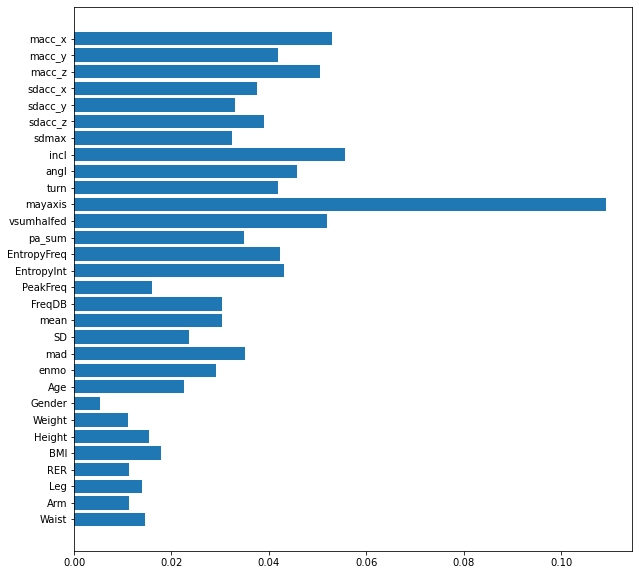

In [16]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), rf_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 2:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_features=21, random_state=42))
rf_y_score = rf_classifier.fit(X_train_new_rf, y_train_new_rf).predict_proba(X_test_new_rf)

## For plotting confusion matrix with StackingClassifier

In [10]:
# Number of trees
n_estimators = [490]         #490 too long to compute ---> EXCEPT FOR THIS ONE AS I ALSO DID IT BEFORE 
# Number of features to consider at every split
max_features = [22]

# Dictionary to store the hyperparameters
param_grid_rf = { 'n_estimators': n_estimators,
                  'max_features': max_features}

# Base model
rf = RandomForestClassifier(random_state=42)                 # random_state=42

In [11]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=22, n_estimators=490 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ max_features=22, n_estimators=490, total=19.5min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 19.5min remaining:    0.0s


[CV] max_features=22, n_estimators=490 ...............................
[CV] ................ max_features=22, n_estimators=490, total=17.8min
[CV] max_features=22, n_estimators=490 ...............................
[CV] ................ max_features=22, n_estimators=490, total=17.8min
[CV] max_features=22, n_estimators=490 ...............................
[CV] ................ max_features=22, n_estimators=490, total=17.9min
[CV] max_features=22, n_estimators=490 ...............................
[CV] ................ max_features=22, n_estimators=490, total=17.8min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 90.8min finished


{'max_features': 22, 'n_estimators': 490}
0.7428604756978864


Feature: 0, Score: 0.05243
Feature: 1, Score: 0.04236
Feature: 2, Score: 0.05065
Feature: 3, Score: 0.03852
Feature: 4, Score: 0.03304
Feature: 5, Score: 0.03945
Feature: 6, Score: 0.03205
Feature: 7, Score: 0.05601
Feature: 8, Score: 0.04642
Feature: 9, Score: 0.04155
Feature: 10, Score: 0.10789
Feature: 11, Score: 0.05159
Feature: 12, Score: 0.03523
Feature: 13, Score: 0.04191
Feature: 14, Score: 0.04277
Feature: 15, Score: 0.01633
Feature: 16, Score: 0.03052
Feature: 17, Score: 0.02963
Feature: 18, Score: 0.02347
Feature: 19, Score: 0.03504
Feature: 20, Score: 0.02925
Feature: 21, Score: 0.02310
Feature: 22, Score: 0.00538
Feature: 23, Score: 0.01114
Feature: 24, Score: 0.01507
Feature: 25, Score: 0.01800
Feature: 26, Score: 0.01111
Feature: 27, Score: 0.01396
Feature: 28, Score: 0.01148
Feature: 29, Score: 0.01465


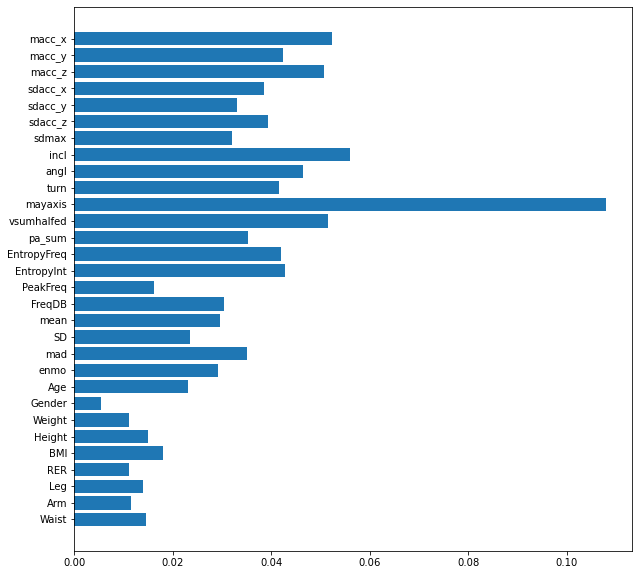

In [12]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), rf_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [13]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_stack = RandomForestClassifier(n_estimators=490, max_features=21, random_state=42)
rf_stack.fit(X_train_new_rf, y_train_new_rf)
print(rf_stack.score(X_train_new_rf, y_train_new_rf))
print(rf_stack.score(X_test_new_rf, y_test_new_rf))

1.0
0.7361238154476601


# XGBoostClassifier

## With "mets" feature

In [13]:
# Number of boosting rounds
n_estimators = [15]
# Maximum tree depth
max_depth = [15]
# Boosting learning rate
learning_rate  = [0.1]
# Number of samples used to fit each tree
subsample = [1.0]
# Number of features used to fit each tree
colsample_bytree = [1.0]

# Dictionary to store the hyperparameters
param_grid_xgb = { 'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'learning_rate': learning_rate,
                   'subsample': subsample,
                   'colsample_bytree': colsample_bytree}

# Base model
xgb = XGBClassifier(use_label_encoder='false', random_state=42) # random_state=42

In [17]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.7min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[15:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.8min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[15:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.7min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.6min finished


[15:26:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.8427489244155228


# Second run (final)

In [19]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 2.0min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[16:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 2.0min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[16:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.7min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.4min finished


[16:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.8427489244155228


# Second run (final) ROC/AUC purpose

In [44]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train[:, 0])
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=   9.7s
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


[20:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=   9.7s
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[20:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=   9.8s
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.3s finished


[20:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.9840562665038073


In [14]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train[:, 0])
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=  48.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.0s remaining:    0.0s


[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[13:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=  12.0s
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[13:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


[13:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.9840562665038073


In [29]:
y_train.shape

(109322, 11)

In [16]:
y_train.reshape(1, -1)

array([[0, 0, 0, ..., 0, 0, 0]])

In [32]:
X_train.shape

(109322, 31)

In [42]:
y_train[:, 0].shape

(109322,)

# Feature selection

Feature: 0, Score: 0.06563
Feature: 1, Score: 0.02640
Feature: 2, Score: 0.01888
Feature: 3, Score: 0.02649
Feature: 4, Score: 0.03802
Feature: 5, Score: 0.01355
Feature: 6, Score: 0.01557
Feature: 7, Score: 0.02157
Feature: 8, Score: 0.04177
Feature: 9, Score: 0.03731
Feature: 10, Score: 0.02401
Feature: 11, Score: 0.03074
Feature: 12, Score: 0.02752
Feature: 13, Score: 0.03619
Feature: 14, Score: 0.07075
Feature: 15, Score: 0.06175
Feature: 16, Score: 0.01476
Feature: 17, Score: 0.03004
Feature: 18, Score: 0.02171
Feature: 19, Score: 0.01495
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.05481
Feature: 23, Score: 0.04270
Feature: 24, Score: 0.04061
Feature: 25, Score: 0.04269
Feature: 26, Score: 0.05110
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.04321
Feature: 29, Score: 0.04217
Feature: 30, Score: 0.04509


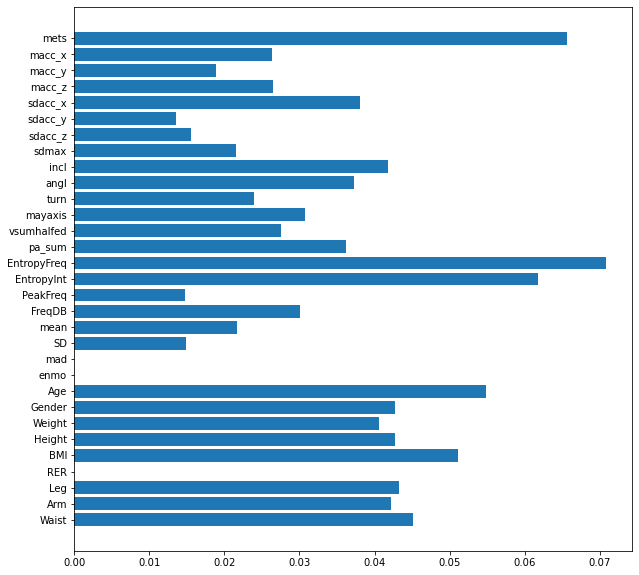

In [25]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Second run (final)

Feature: 0, Score: 0.06563
Feature: 1, Score: 0.02640
Feature: 2, Score: 0.01888
Feature: 3, Score: 0.02649
Feature: 4, Score: 0.03802
Feature: 5, Score: 0.01355
Feature: 6, Score: 0.01557
Feature: 7, Score: 0.02157
Feature: 8, Score: 0.04177
Feature: 9, Score: 0.03731
Feature: 10, Score: 0.02401
Feature: 11, Score: 0.03074
Feature: 12, Score: 0.02752
Feature: 13, Score: 0.03619
Feature: 14, Score: 0.07075
Feature: 15, Score: 0.06175
Feature: 16, Score: 0.01476
Feature: 17, Score: 0.03004
Feature: 18, Score: 0.02171
Feature: 19, Score: 0.01495
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.05481
Feature: 23, Score: 0.04270
Feature: 24, Score: 0.04061
Feature: 25, Score: 0.04269
Feature: 26, Score: 0.05110
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.04321
Feature: 29, Score: 0.04217
Feature: 30, Score: 0.04509


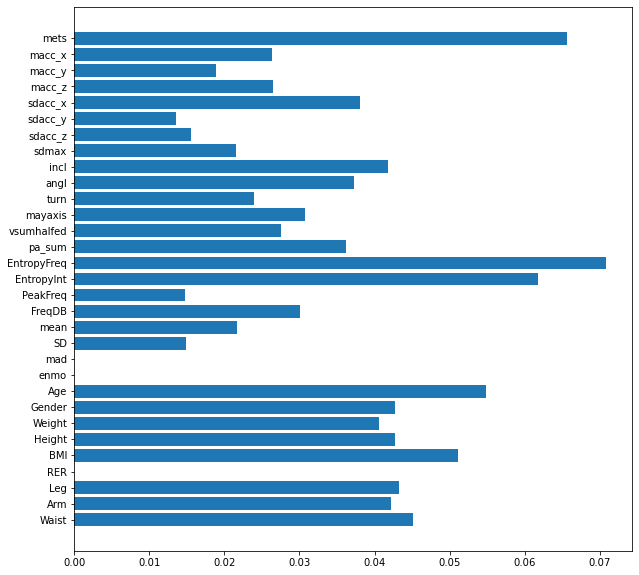

In [20]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Second run (final) ROC/AUC purpose

Feature: 0, Score: 0.06674
Feature: 1, Score: 0.03246
Feature: 2, Score: 0.02764
Feature: 3, Score: 0.03508
Feature: 4, Score: 0.01117
Feature: 5, Score: 0.01010
Feature: 6, Score: 0.01347
Feature: 7, Score: 0.01568
Feature: 8, Score: 0.04472
Feature: 9, Score: 0.04315
Feature: 10, Score: 0.03507
Feature: 11, Score: 0.03129
Feature: 12, Score: 0.03010
Feature: 13, Score: 0.12832
Feature: 14, Score: 0.01141
Feature: 15, Score: 0.00570
Feature: 16, Score: 0.00476
Feature: 17, Score: 0.00666
Feature: 18, Score: 0.03715
Feature: 19, Score: 0.00921
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.04392
Feature: 23, Score: 0.04599
Feature: 24, Score: 0.05048
Feature: 25, Score: 0.05065
Feature: 26, Score: 0.02809
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.07349
Feature: 29, Score: 0.05016
Feature: 30, Score: 0.05733


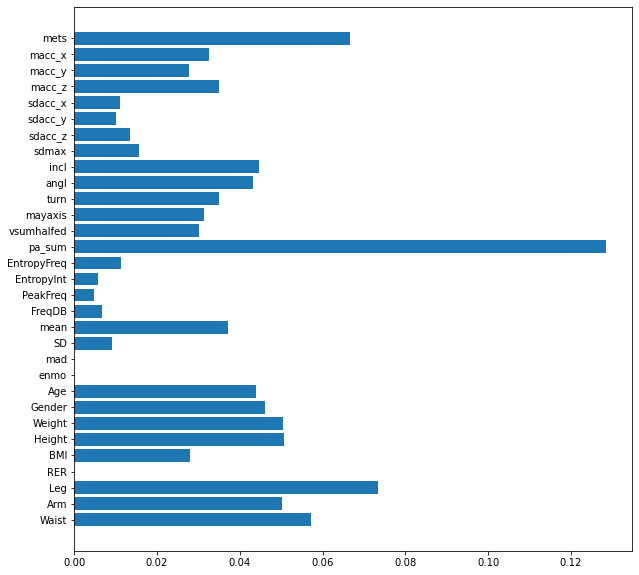

In [45]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

Feature: 0, Score: 0.06674
Feature: 1, Score: 0.03246
Feature: 2, Score: 0.02764
Feature: 3, Score: 0.03508
Feature: 4, Score: 0.01117
Feature: 5, Score: 0.01010
Feature: 6, Score: 0.01347
Feature: 7, Score: 0.01568
Feature: 8, Score: 0.04472
Feature: 9, Score: 0.04315
Feature: 10, Score: 0.03507
Feature: 11, Score: 0.03129
Feature: 12, Score: 0.03010
Feature: 13, Score: 0.12832
Feature: 14, Score: 0.01141
Feature: 15, Score: 0.00570
Feature: 16, Score: 0.00476
Feature: 17, Score: 0.00666
Feature: 18, Score: 0.03715
Feature: 19, Score: 0.00921
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.04392
Feature: 23, Score: 0.04599
Feature: 24, Score: 0.05048
Feature: 25, Score: 0.05065
Feature: 26, Score: 0.02809
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.07349
Feature: 29, Score: 0.05016
Feature: 30, Score: 0.05733


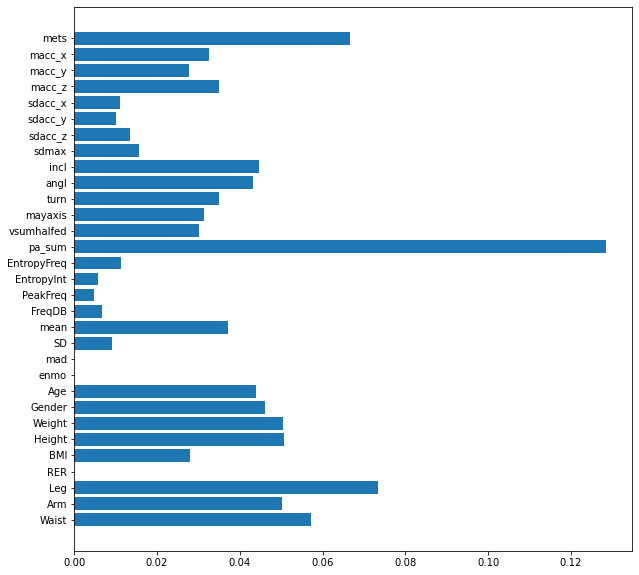

In [15]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# ROC/AUC purpose

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_xgb = df_features.iloc[:, importance_xgb>=0.025]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_classifier = OneVsRestClassifier(XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0))
xgb_y_score = xgb_classifier.fit(X_train_new_xgb, y_train_new_xgb).predict_proba(X_test_new_xgb)

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

# Second run (final) ROC/AUC purpose

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new_xgb = df_features.iloc[:, importance_xgb>=0.02]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_classifier = OneVsRestClassifier(XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0, random_state=42))
xgb_y_score = xgb_classifier.fit(X_train_new_xgb, y_train_new_xgb).predict_proba(X_test_new_xgb)

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [53]:
from sklearn.metrics import roc_auc_score
pred_train_xgb = xgb_classifier.predict(X_train_new_xgb)
pred_test_xgb = xgb_classifier.predict(X_test_new_xgb)
print("Train accuracy: ", xgb_classifier.score(X_train_new_xgb, y_train_new_xgb))
print("Test accuracy: ", xgb_classifier.score(X_test_new_xgb, y_test_new_xgb))

auc_tr_xgb = roc_auc_score(y_train_new_xgb, xgb_classifier.predict_proba(X_train_new_xgb), average='macro', multi_class='ovr')
auc_ts_xgb = roc_auc_score(y_test_new_xgb, xgb_classifier.predict_proba(X_test_new_xgb), average='macro', multi_class='ovr')

print("Train AUC score: ", auc_tr_xgb)
print("Test AUC score: ", auc_ts_xgb)

Train accuracy:  0.9055633815700408
Test accuracy:  0.7546010025246057


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train AUC score:  0.997318609683057
Test AUC score:  0.9860389360832922


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_train_new_xgb, pred_train_xgb))
print(classification_report(y_test_new_xgb, pred_test_xgb))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      6750
           1       0.98      0.95      0.96      6755
           2       0.98      0.95      0.96      6736
           3       0.94      0.85      0.89      6722
           4       0.97      0.91      0.94      6749
           5       0.98      0.89      0.93      6712
           6       0.98      0.86      0.91      6721
           7       0.94      0.93      0.93      6724
           8       0.98      0.86      0.92      4213
           9       1.00      0.93      0.96      3042
          10       0.97      0.94      0.96     48198

   micro avg       0.97      0.92      0.95    109322
   macro avg       0.97      0.91      0.94    109322
weighted avg       0.97      0.92      0.95    109322
 samples avg       0.91      0.92      0.92    109322

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1650
           1       0.92 

C:\Anaconda\envs\Classification\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Second run (final) confusion matrix purpose

In [25]:
# Retrain with feature selection
df_features = df.iloc[:, 1:32]
X_new_xgb = df_features.iloc[:, importance_xgb>=0.03]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_stack = XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0, random_state=42)
xgb_stack.fit(X_train_new_xgb, y_train_new_xgb)
print("Train accuracy: ", xgb_stack.score(X_train_new_xgb, y_train_new_xgb))
print("Test accuracy: ", xgb_stack.score(X_test_new_xgb, y_test_new_xgb))

[17:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy:  0.9660544080788862
Test accuracy:  0.8625736343346383


## Without "mets" feature

In [21]:
# Number of boosting rounds
n_estimators = [15]
# Maximum tree depth
max_depth = [15]
# Boosting learning rate
learning_rate  = [0.1]
# Number of samples used to fit each tree
subsample = [1.0]
# Number of features used to fit each tree
colsample_bytree = [1.0]

# Dictionary to store the hyperparameters
param_grid_xgb = { 'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'learning_rate': learning_rate,
                   'subsample': subsample,
                   'colsample_bytree': colsample_bytree}

# Base model
xgb = XGBClassifier(use_label_encoder='false', random_state=42) # random_state=42

In [22]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train[:, 0])
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=  23.4s
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s


[17:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=   9.7s
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[17:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total=  10.4s
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


[17:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.9758145725746648


Feature: 0, Score: 0.03246
Feature: 1, Score: 0.02459
Feature: 2, Score: 0.03341
Feature: 3, Score: 0.01687
Feature: 4, Score: 0.01177
Feature: 5, Score: 0.01215
Feature: 6, Score: 0.03326
Feature: 7, Score: 0.02839
Feature: 8, Score: 0.03947
Feature: 9, Score: 0.02567
Feature: 10, Score: 0.03257
Feature: 11, Score: 0.03204
Feature: 12, Score: 0.07121
Feature: 13, Score: 0.01259
Feature: 14, Score: 0.00830
Feature: 15, Score: 0.00790
Feature: 16, Score: 0.16649
Feature: 17, Score: 0.03501
Feature: 18, Score: 0.01824
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.03515
Feature: 22, Score: 0.05004
Feature: 23, Score: 0.03865
Feature: 24, Score: 0.04063
Feature: 25, Score: 0.05430
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.05322
Feature: 28, Score: 0.03270
Feature: 29, Score: 0.05291


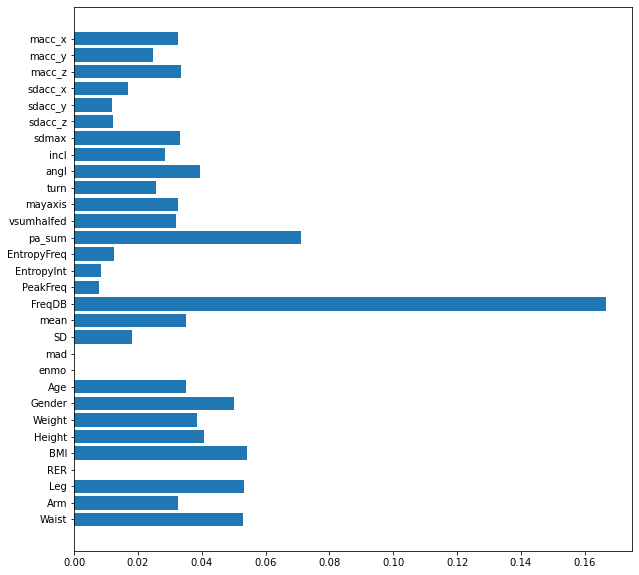

In [23]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 2:32]
X_new_xgb = df_features.iloc[:, importance_xgb>=0.02]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_classifier = OneVsRestClassifier(XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0, random_state=42))
xgb_y_score = xgb_classifier.fit(X_train_new_xgb, y_train_new_xgb).predict_proba(X_test_new_xgb)

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## For plotting confusion matrix with StackingClassifier

In [14]:
# Number of boosting rounds
n_estimators = [15]
# Maximum tree depth
max_depth = [15]
# Boosting learning rate
learning_rate  = [0.1]
# Number of samples used to fit each tree
subsample = [1.0]
# Number of features used to fit each tree
colsample_bytree = [1.0]

# Dictionary to store the hyperparameters
param_grid_xgb = { 'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'learning_rate': learning_rate,
                   'subsample': subsample,
                   'colsample_bytree': colsample_bytree}

# Base model
xgb = XGBClassifier(use_label_encoder='false', random_state=42) # random_state=42

In [16]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train)  #y_train[:, 0]
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 2.9min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[16:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.8min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[16:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.8min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.1min finished


[16:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.7217028117772557


Feature: 0, Score: 0.02888
Feature: 1, Score: 0.02056
Feature: 2, Score: 0.02926
Feature: 3, Score: 0.05857
Feature: 4, Score: 0.02183
Feature: 5, Score: 0.02466
Feature: 6, Score: 0.02398
Feature: 7, Score: 0.04104
Feature: 8, Score: 0.04115
Feature: 9, Score: 0.02559
Feature: 10, Score: 0.03481
Feature: 11, Score: 0.02922
Feature: 12, Score: 0.06793
Feature: 13, Score: 0.06303
Feature: 14, Score: 0.04825
Feature: 15, Score: 0.01778
Feature: 16, Score: 0.03564
Feature: 17, Score: 0.02427
Feature: 18, Score: 0.02114
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.05558
Feature: 22, Score: 0.03793
Feature: 23, Score: 0.03997
Feature: 24, Score: 0.04273
Feature: 25, Score: 0.04066
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.04022
Feature: 28, Score: 0.03836
Feature: 29, Score: 0.04693


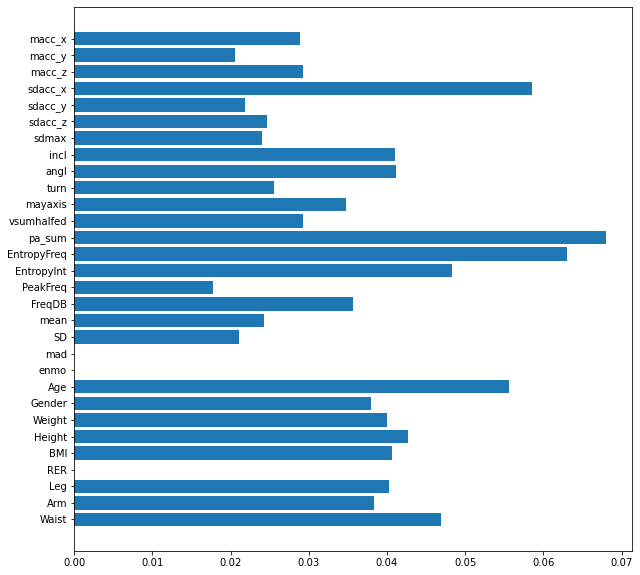

In [17]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [19]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_xgb = df_features.iloc[:, importance_xgb>=0.03]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_stack = XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0, random_state=42)
xgb_stack.fit(X_train_new_xgb, y_train_new_xgb)
print("Train accuracy: ", xgb_stack.score(X_train_new_xgb, y_train_new_xgb))
print("Test accuracy: ", xgb_stack.score(X_test_new_xgb, y_test_new_xgb))

[17:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train accuracy:  0.9094235378057481
Test accuracy:  0.7265010427719439


# StackingClassifier

## With "mets" feature

In [17]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Define the base models
estimators  = list()
estimators.append(('dt', dt_stack))
estimators.append(('knn', knn_stack))
estimators.append(('rf', rf_stack))
estimators.append(('xgb', xgb_stack))
# Define meta learner model
final_estimator = ExtraTreesClassifier(random_state=42) # OneVsRestClassifier, GaussianNB(naive_bayes), ExtraTreesClassifier
# Define the stacking ensemble
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
# Fit the model on all available data
#X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(X, Y, test_size=0.2, random_state=42)
stack.fit(X_train, y_train)
print("Train accuracy: ", stack.score(X_train, y_train))
print("Test accuracy: ", stack.score(X_test, y_test))

NameError: name 'dt_stack' is not defined

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
pred_train_stack = stack.predict(X_train)
pred_test_stack = stack.predict(X_test)
print("---------------Confusion Matrix---------------")
print(confusion_matrix(y_test, pred_test_stack))
print("---------------Classification report - train---------------")
print(classification_report(y_train, pred_train_stack))
print("---------------Classification report - test---------------")
print(classification_report(y_test, pred_test_stack))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


---------------Confusion Matrix---------------
[[ 1527    14     2     1     0     0     0     0     0    14    92]
 [   15  1521    17     0     0     0     0     0     0     2    90]
 [    6    13  1510     0     0     1     0     0     0     3   131]
 [    0     0     0  1420    46     0     3     1     0     0   208]
 [    0     0     0    32  1437    32    11     6     7     0   126]
 [    0     0     2     8    46  1452    31    11    14     0   124]
 [    0     0     1     3    11    10  1368     5    76     0   205]
 [    0     0     0     3     1     9    16  1437     3     0   207]
 [    0     0     0     0     7    16    93     3   824     1   123]
 [   10     6     2     0     0     0     0     0     0   670    63]
 [   56    74   111   129   151   123   151   191   106    43 11047]]
---------------Classification report - train---------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       1.00 

# Plotting confusion matrix

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Confusion matrix, without normalization
[[ 1527    14     2     1     0     0     0     0     0    14    92]
 [   15  1521    17     0     0     0     0     0     0     2    90]
 [    6    13  1510     0     0     1     0     0     0     3   131]
 [    0     0     0  1420    46     0     3     1     0     0   208]
 [    0     0     0    32  1437    32    11     6     7     0   126]
 [    0     0     2     8    46  1452    31    11    14     0   124]
 [    0     0     1     3    11    10  1368     5    76     0   205]
 [    0     0     0     3     1     9    16  1437     3     0   207]
 [    0     0     0     0     7    16    93     3   824     1   123]
 [   10     6     2     0     0     0     0     0     0   670    63]
 [   56    74   111   129   151   123   151   191   106    43 11047]]


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Normalized confusion matrix
[[9.25454545e-01 8.48484848e-03 1.21212121e-03 6.06060606e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.48484848e-03 5.57575758e-02]
 [9.11854103e-03 9.24620061e-01 1.03343465e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.21580547e-03 5.47112462e-02]
 [3.60576923e-03 7.81250000e-03 9.07451923e-01 0.00000000e+00
  0.00000000e+00 6.00961538e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.80288462e-03 7.87259615e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.46245530e-01
  2.74135876e-02 0.00000000e+00 1.78784267e-03 5.95947557e-04
  0.00000000e+00 0.00000000e+00 1.23957092e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.93821926e-02
  8.70381587e-01 1.93821926e-02 6.66262871e-03 3.63416111e-03
  4.23985463e-03 0.00000000e+00 7.63173834e-02]
 [0.00000000e+00 0.00000000e+00 1.18483412e-03 4.73933649e-03
  2.72511848e-02 8.60189573e-01 1.83649289e-02 6.5

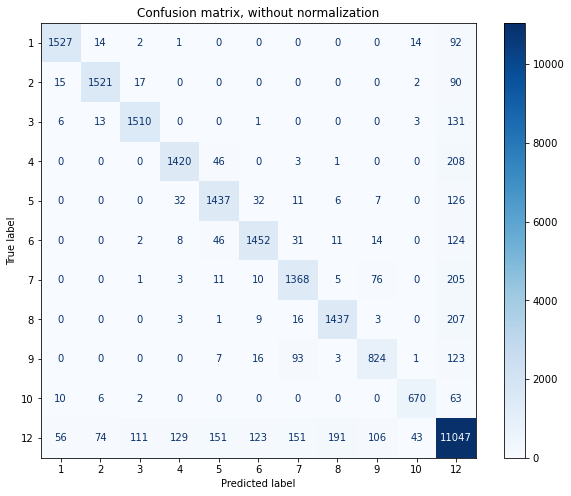

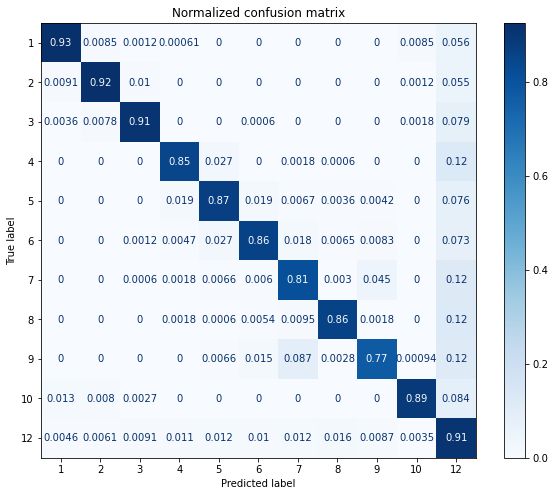

In [35]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(stack, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# Data for ROC curve and AUC barchart

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
st_classifier = OneVsRestClassifier(model)
st_y_score = st_classifier.fit(X_train, y_train).predict_proba(X_test)

st_brah = st_classifier.fit(X_train, y_train)
print("Train accuracy: ", st_brah.score(X_train, y_train))
print("Test accuracy: ", st_brah.score(X_test, y_test))

auc_tr = roc_auc_score(y_train, st_brah.predict_proba(X_train), average='macro', multi_class='ovr')
auc_ts = roc_auc_score(y_test, st_brah.predict_proba(X_test), average='macro', multi_class='ovr')

print("AUC train: ", auc_tr)
print("AUC test: ", auc_ts)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:45:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\sklearn\multiclass.py:382: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\sklearn\multiclass.py:382: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
from sklearn.multiclass import OneVsRestClassifier
X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(X, Y, test_size=0.2, random_state=42)
st_classifier = OneVsRestClassifier(model)
st_y_score = st_classifier.fit(X_train_new_st, y_train_new_st).predict_proba(X_test_new_st)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Second run (final) ROC/AUC purpose

In [18]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multiclass import OneVsRestClassifier
# Define the base models
estimat  = list()
estimat.append(('dt', dt_classifier))
estimat.append(('knn', knn_classifier))
estimat.append(('rf', rf_classifier))
estimat.append(('xgb', xgb_classifier))
# Define meta learner model
final_estimat = ExtraTreesClassifier(random_state=42) # OneVsRestClassifier, GaussianNB(naive_bayes), ExtraTreesClassifier
# Define the stacking ensemble
st_classifier = StackingClassifier(estimators=estimat , final_estimator=final_estimat, cv=5)
# Fit the model on all available data
X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(X, Y, test_size=0.2, random_state=42)
#st_classifier.fit(X_train_new_st, y_train_new_st[:, 0])
st_classifier = OneVsRestClassifier(st_classifier)
st_y_score = xgb_classifier.fit(X_train_new_st, y_train_new_st).predict_proba(X_test_new_st)
#print("Train accuracy: ", st_classifier.score(X_train_new_st, y_train_new_st).argmax(axis=1))
#print("Test accuracy: ", st_classifier.score(X_test_new_st, y_test_new_st).argmax(axis=1))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Wall time: 3min 9s
Parser   : 166 ms


In [85]:
y_train_new_st[:, 0].shape

(109322,)

In [94]:
print("Train accuracy: ", st_classifier.score(X_train_new_st, y_train_new_st))
print("Test accuracy: ", st_classifier.score(X_test_new_st, y_test_new_st))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1202542, 109322]

In [95]:
y_train_new_st.ravel().shape

(1202542,)

In [97]:
y_test_new_st.ravel().shape

(300641,)

In [98]:
X_test_new_st.shape

(27331, 31)

In [99]:
y_train_new_st = torch.argmax(y_test, dim=1)

NameError: name 'torch' is not defined

## Without "mets" feature

In [25]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multiclass import OneVsRestClassifier
# Define the base models
estimat  = list()
estimat.append(('dt', dt_classifier))
estimat.append(('knn', knn_classifier))
estimat.append(('rf', rf_classifier))
estimat.append(('xgb', xgb_classifier))
# Define meta learner model
final_estimat = ExtraTreesClassifier(random_state=42) # OneVsRestClassifier, GaussianNB(naive_bayes), ExtraTreesClassifier
# Define the stacking ensemble
st_classifier = StackingClassifier(estimators=estimat , final_estimator=final_estimat, cv=5)
# Fit the model on all available data
X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(X, Y, test_size=0.2, random_state=42)
#st_classifier.fit(X_train_new_st, y_train_new_st[:, 0])
st_classifier = OneVsRestClassifier(st_classifier)
st_y_score = xgb_classifier.fit(X_train_new_st, y_train_new_st).predict_proba(X_test_new_st)
#print("Train accuracy: ", st_classifier.score(X_train_new_st, y_train_new_st).argmax(axis=1))
#print("Test accuracy: ", st_classifier.score(X_test_new_st, y_test_new_st).argmax(axis=1))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Wall time: 2min 11s
Parser   : 181 ms


## For plotting confusion matrix with StackingClassifier

In [ ]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Define the base models
estimators  = list()
estimators.append(('dt', dt_stack))
estimators.append(('knn', knn_stack))
estimators.append(('rf', rf_stack))
estimators.append(('xgb', xgb_stack))
# Define meta learner model
final_estimator = ExtraTreesClassifier(random_state=42) # OneVsRestClassifier, GaussianNB(naive_bayes), ExtraTreesClassifier
# Define the stacking ensemble
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
# Fit the model on all available data
#X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(X, Y, test_size=0.2, random_state=42)
stack.fit(X_train, y_train)
print("Train accuracy: ", stack.score(X_train, y_train))
print("Test accuracy: ", stack.score(X_test, y_test))

AttributeError: 'StackingClassifier' object has no attribute 'estimators_'

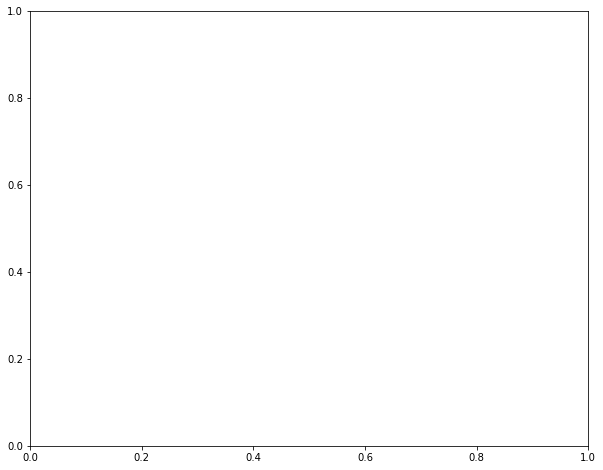

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(stack, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# VotingClassifier

In [37]:
%%time
from sklearn.ensemble import VotingClassifier
# Ensemble of models
esti = list()               # estimator = []
esti.append(('DT', dt_stack))
esti.append(('KNN', knn_stack))
esti.append(('RF', rf_stack))
esti.append(('XGB', xgb_stack))
esti.append(('ST', stack))

# VotingClassifier with hard voting
vot_hard = VotingClassifier(estimators = esti, voting ='hard', verbose='true')
vot_hard.fit(X_train, y_train)
print("Train accuracy: ", vot_hard.score(X_train, y_train))
print("Test accuracy: ", vot_hard.score(X_test, y_test))


#y_pred_hard = vot_hard.predict(X_test)

# Using accuracy_score metric to predict accuracy
#score_hard = accuracy_score(y_test, y_pred_hard)
#print("Hard Voting Score % d" % score_hard)

# VotingClassifier with soft voting
vot_soft = VotingClassifier(estimators = esti, voting ='soft', verbose='true')
vot_soft.fit(X_train, y_train)
print("Train accuracy: ", vot_soft.score(X_train, y_train))
print("Test accuracy: ", vot_soft.score(X_test, y_test))


#y_pred_soft = vot_soft.predict(X_test)

# Using accuracy_score metric to predict accuracy
#score_soft = accuracy_score(y_test, y_pred_soft)
#print("Soft Voting Score % d" % score_soft)

[Voting] ....................... (1 of 5) Processing DT, total=  11.3s
[Voting] ...................... (2 of 5) Processing KNN, total=   1.9s
[Voting] ....................... (3 of 5) Processing RF, total=23.2min


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Voting] ...................... (4 of 5) Processing XGB, total= 2.8min


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train accuracy:  1.0


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Test accuracy:  0.8804288170941422
[Voting] ....................... (1 of 5) Processing DT, total=  10.6s
[Voting] ...................... (2 of 5) Processing KNN, total=   3.9s
[Voting] ....................... (3 of 5) Processing RF, total=21.6min


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Voting] ...................... (4 of 5) Processing XGB, total= 2.8min


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train accuracy:  1.0


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Test accuracy:  0.8653177710292342
Wall time: 5h 57min 56s


# Evaluate model - vote hard

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
pred_train_vote_hard = vot_hard.predict(X_train)
pred_test_vote_hard = vot_hard.predict(X_test)
print("---------------Confusion Matrix---------------")
print(confusion_matrix(y_test, pred_test_vote_hard))
print("---------------Classification report - train---------------")
print(classification_report(y_train, pred_train_vote_hard))
print("---------------Classification report - test---------------")
print(classification_report(y_test, pred_test_vote_hard))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


---------------Confusion Matrix---------------
[[ 1519    12     4     1     0     0     0     0     0     9   105]
 [   15  1511    15     0     0     0     0     0     0     1   103]
 [    5    15  1486     1     0     1     0     0     0     1   155]
 [    0     0     0  1403    47     0     3     1     0     0   224]
 [    0     0     0    38  1424    35    10     4     5     0   135]
 [    0     0     3    10    45  1439    33     8    13     0   137]
 [    0     0     0     4    11    12  1345     5    74     0   228]
 [    0     0     0     3     2     9    15  1431     3     0   213]
 [    0     0     0     0     8    19    91     3   811     1   134]
 [   13     6     2     0     0     0     0     0     0   652    78]
 [   52    81   103   137   158   132   144   207    97    29 11042]]
---------------Classification report - train---------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       1.00 

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Confusion matrix, without normalization
[[ 1519    12     4     1     0     0     0     0     0     9   105]
 [   15  1511    15     0     0     0     0     0     0     1   103]
 [    5    15  1486     1     0     1     0     0     0     1   155]
 [    0     0     0  1403    47     0     3     1     0     0   224]
 [    0     0     0    38  1424    35    10     4     5     0   135]
 [    0     0     3    10    45  1439    33     8    13     0   137]
 [    0     0     0     4    11    12  1345     5    74     0   228]
 [    0     0     0     3     2     9    15  1431     3     0   213]
 [    0     0     0     0     8    19    91     3   811     1   134]
 [   13     6     2     0     0     0     0     0     0   652    78]
 [   52    81   103   137   158   132   144   207    97    29 11042]]


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Normalized confusion matrix
[[9.20606061e-01 7.27272727e-03 2.42424242e-03 6.06060606e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.45454545e-03 6.36363636e-02]
 [9.11854103e-03 9.18541033e-01 9.11854103e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.07902736e-04 6.26139818e-02]
 [3.00480769e-03 9.01442308e-03 8.93028846e-01 6.00961538e-04
  0.00000000e+00 6.00961538e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.00961538e-04 9.31490385e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.36114422e-01
  2.80095352e-02 0.00000000e+00 1.78784267e-03 5.95947557e-04
  0.00000000e+00 0.00000000e+00 1.33492253e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.30163537e-02
  8.62507571e-01 2.11992732e-02 6.05693519e-03 2.42277408e-03
  3.02846760e-03 0.00000000e+00 8.17686251e-02]
 [0.00000000e+00 0.00000000e+00 1.77725118e-03 5.92417062e-03
  2.66587678e-02 8.52488152e-01 1.95497630e-02 4.7

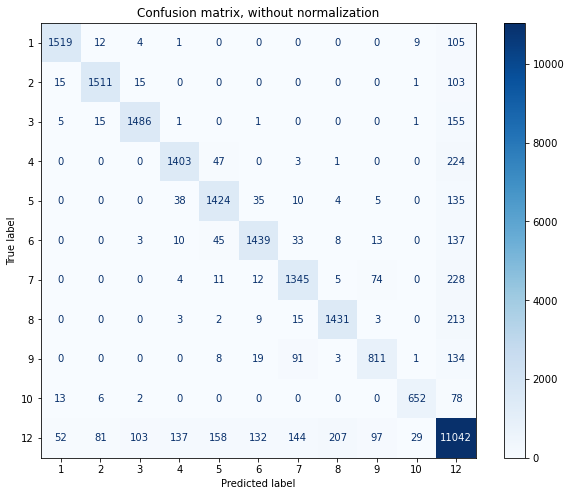

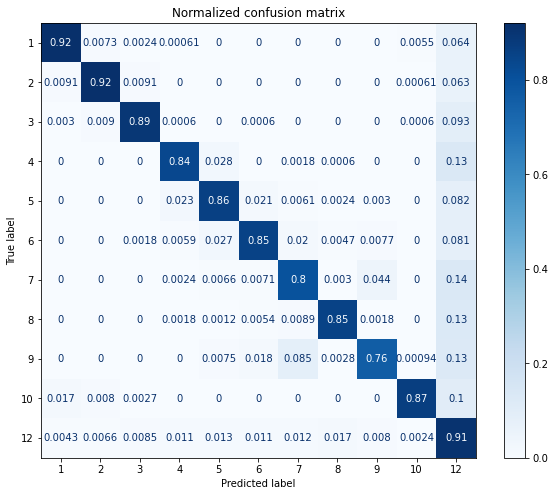

In [40]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(vot_hard, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

# Evaluate model - vote soft

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
pred_train_vote_soft = vot_soft.predict(X_train)
pred_test_vote_soft = vot_soft.predict(X_test)
print("---------------Confusion Matrix---------------")
print(confusion_matrix(y_test, pred_test_vote_soft))
print("---------------Classification report - train---------------")
print(classification_report(y_train, pred_train_vote_soft))
print("---------------Classification report - test---------------")
print(classification_report(y_test, pred_test_vote_soft))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


---------------Confusion Matrix---------------
[[ 1495    11     4     1     0     0     0     0     0    15   124]
 [   16  1497    12     0     0     0     0     0     0     2   118]
 [    6    18  1470     2     0     1     0     1     0     2   164]
 [    0     0     1  1405    47     2     5     2     0     0   216]
 [    0     0     0    43  1380    36    12     3     7     0   170]
 [    0     0     1    11    46  1407    39     6    17     0   161]
 [    0     0     0     5    13    12  1271     7   104     0   267]
 [    0     0     0     3     2     6    15  1397     2     0   251]
 [    0     0     0     2    12    24   107     7   748     1   166]
 [   15     9     3     0     0     0     0     0     0   643    81]
 [   59    84   114   146   171   129   171   233   103    35 10937]]
---------------Classification report - train---------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       1.00 

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Confusion matrix, without normalization
[[ 1495    11     4     1     0     0     0     0     0    15   124]
 [   16  1497    12     0     0     0     0     0     0     2   118]
 [    6    18  1470     2     0     1     0     1     0     2   164]
 [    0     0     1  1405    47     2     5     2     0     0   216]
 [    0     0     0    43  1380    36    12     3     7     0   170]
 [    0     0     1    11    46  1407    39     6    17     0   161]
 [    0     0     0     5    13    12  1271     7   104     0   267]
 [    0     0     0     3     2     6    15  1397     2     0   251]
 [    0     0     0     2    12    24   107     7   748     1   166]
 [   15     9     3     0     0     0     0     0     0   643    81]
 [   59    84   114   146   171   129   171   233   103    35 10937]]


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Normalized confusion matrix
[[9.06060606e-01 6.66666667e-03 2.42424242e-03 6.06060606e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.09090909e-03 7.51515152e-02]
 [9.72644377e-03 9.10030395e-01 7.29483283e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.21580547e-03 7.17325228e-02]
 [3.60576923e-03 1.08173077e-02 8.83413462e-01 1.20192308e-03
  0.00000000e+00 6.00961538e-04 0.00000000e+00 6.00961538e-04
  0.00000000e+00 1.20192308e-03 9.85576923e-02]
 [0.00000000e+00 0.00000000e+00 5.95947557e-04 8.37306317e-01
  2.80095352e-02 1.19189511e-03 2.97973778e-03 1.19189511e-03
  0.00000000e+00 0.00000000e+00 1.28724672e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.60448213e-02
  8.35857056e-01 2.18049667e-02 7.26832223e-03 1.81708056e-03
  4.23985463e-03 0.00000000e+00 1.02967898e-01]
 [0.00000000e+00 0.00000000e+00 5.92417062e-04 6.51658768e-03
  2.72511848e-02 8.33530806e-01 2.31042654e-02 3.5

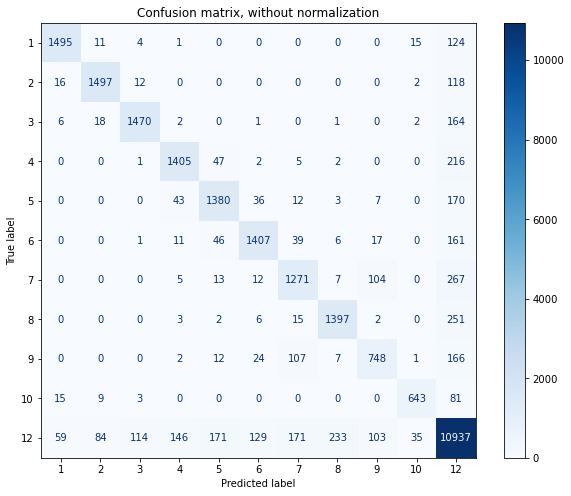

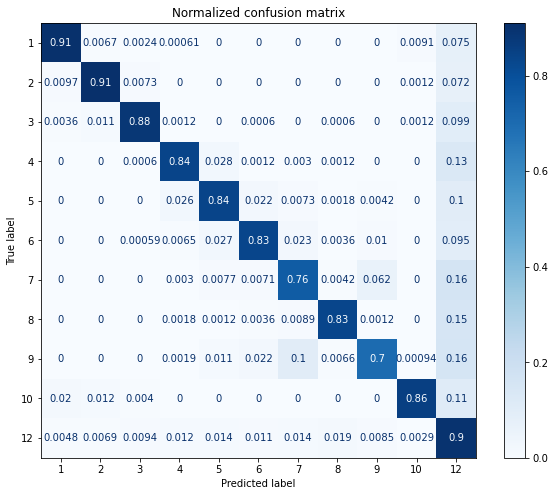

In [41]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(vot_soft, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
# Using accuracy_score metric to predict accuracy
score_hard = accuracy_score(y_test, y_pred_hard)
print("Hard Voting Score % d" % score_hard)

# VotingClassifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred_soft = vot_soft.predict(X_test)

# Using accuracy_score metric to predict accuracy
score_soft = accuracy_score(y_test, y_pred_soft)
print("Soft Voting Score % d" % score_soft)

Hard Voting Score  0


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Keras model

## With "mets" feature

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Fix random seed for reproducibility
#seed = 7
#numpy.random.seed(seed)
# encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)
# Split into 80% for train and 20% for test
#X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=seed)

# Define the keras model
def keras_model():
    model = Sequential()
    model.add(Dense(40, input_dim=31, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(11, activation='softmax'))  #activation=’softmax’ for classification
# Compile the keras model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #categorical_crossentropy
    return model

# New train, test, split
X_train_new_km, X_test_new_km, y_train_new_km, y_test_new_km = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the keras model on the dataset
#model.fit(X_train_new_km, y_train_new_km, epochs=100, batch_size=50, verbose=1) #verbose=0, epochs=5

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
km_classifier = OneVsRestClassifier(KerasClassifier(keras_model, epochs=1, batch_size=5, verbose=1))
km_y_score = km_classifier.fit(X_train_new_km, y_train_new_km).predict_proba(X_test_new_km)

21865/21865 [==============================] - 31s 1ms/step - loss: 0.6823 - accuracy: 0.5612
Instructions for updating:
Please use `model.predict()` instead.
5467/5467 [==============================] - 4s 647us/step


## Without "mets" feature

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Fix random seed for reproducibility
#seed = 7
#numpy.random.seed(seed)
# encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)
# Split into 80% for train and 20% for test
#X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=seed)

# Define the keras model
def keras_model():
    model = Sequential()
    model.add(Dense(40, input_dim=30, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(11, activation='softmax'))  #activation=’softmax’ for classification
# Compile the keras model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #categorical_crossentropy
    return model

# New train, test, split
X_train_new_km, X_test_new_km, y_train_new_km, y_test_new_km = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the keras model on the dataset
#model.fit(X_train_new_km, y_train_new_km, epochs=100, batch_size=50, verbose=1) #verbose=0, epochs=5

In [29]:
from sklearn.multiclass import OneVsRestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
km_classifier = OneVsRestClassifier(KerasClassifier(keras_model, epochs=1, batch_size=5, verbose=1))
km_y_score = km_classifier.fit(X_train_new_km, y_train_new_km).predict_proba(X_test_new_km)

21865/21865 [==============================] - 32s 1ms/step - loss: 0.6860 - accuracy: 0.5637
Instructions for updating:
Please use `model.predict()` instead.
5467/5467 [==============================] - 4s 678us/step


# ROC curve

## With "mets" feature

## Test with Keras model

<ipython-input-34-c82ac527b834>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_km += interp(all_fpr_km, fpr_km[i], tpr_km[i])


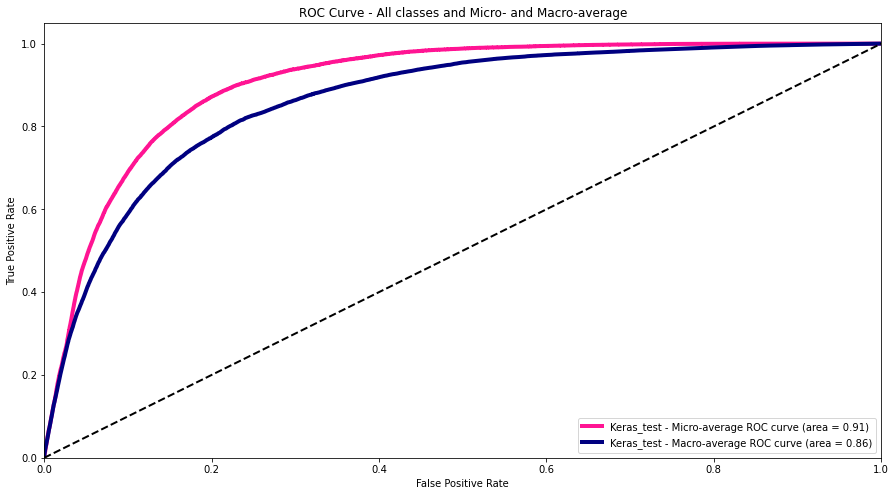

In [34]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (Stacking)
fpr_km = dict()
tpr_km = dict()
roc_auc_km = dict()
for i in range(n_classes):
    fpr_km[i], tpr_km[i], _ = roc_curve(y_test_new_km[:, i], km_y_score[:, i])
    roc_auc_km[i] = auc(fpr_km[i], tpr_km[i])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_km["micro"], tpr_km["micro"], _ = roc_curve(y_test_new_km.ravel(), km_y_score.ravel())
roc_auc_km["micro"] = auc(fpr_km["micro"], tpr_km["micro"])

# First aggregate all false positive rates (Stacking)
all_fpr_km = np.unique(np.concatenate([fpr_km[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_km = np.zeros_like(all_fpr_km)
for i in range(n_classes):
    mean_tpr_km += interp(all_fpr_km, fpr_km[i], tpr_km[i])    
    
# Finally average it and compute AUC (Stacking)
mean_tpr_km /= n_classes

fpr_km["macro"] = all_fpr_km
tpr_km["macro"] = mean_tpr_km
roc_auc_km["macro"] = auc(fpr_km["macro"], tpr_km["macro"])

# Plot all ROC curves (all classes and micro and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (Stacking)
plt.plot(fpr_km["micro"], tpr_km["micro"],
         label='Keras_test - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_km["micro"]),
         color='deeppink', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_km["macro"], tpr_km["macro"],
         label='Keras_test - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_km["macro"]),
         color='navy', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All classes and Micro- and Macro-average')
plt.legend(loc="lower right")
plt.show()

## Test with StackingClassifier

<ipython-input-102-73a89020fc0e>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])


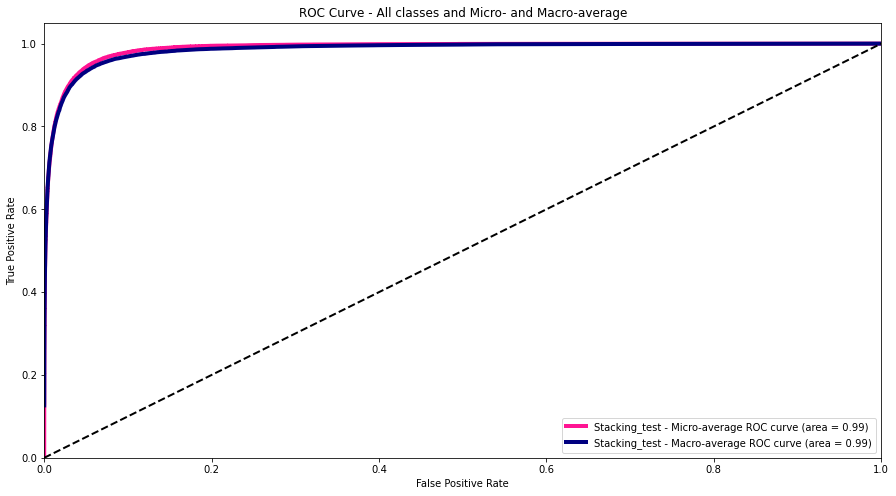

In [102]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (Stacking)
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])    
    
# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Plot all ROC curves (all classes and micro and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (Stacking)
plt.plot(fpr_st["micro"], tpr_st["micro"],
         label='Stacking_test - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["micro"]),
         color='deeppink', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_st["macro"], tpr_st["macro"],
         label='Stacking_test - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["macro"]),
         color='navy', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All classes and Micro- and Macro-average')
plt.legend(loc="lower right")
plt.show()

## Test with XGBClassifier

<ipython-input-60-457d8450ee7b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])


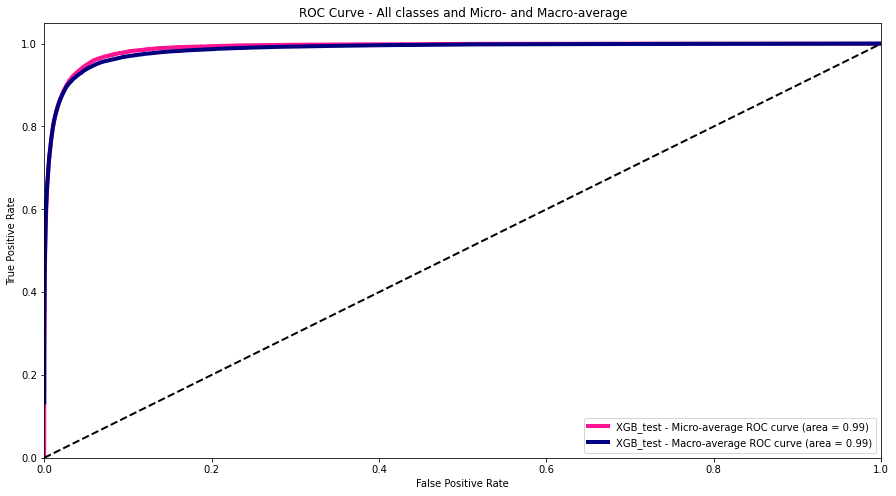

In [60]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (Stacking)
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])    
    
# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Plot all ROC curves (all classes and micro and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (Stacking)
plt.plot(fpr_st["micro"], tpr_st["micro"],
         label='XGB_test - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["micro"]),
         color='deeppink', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_st["macro"], tpr_st["macro"],
         label='XGB_test - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["macro"]),
         color='navy', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All classes and Micro- and Macro-average')
plt.legend(loc="lower right")
plt.show()

## Test plotting two classifiers (DecisionTree and K-NearestNeighbor)

<ipython-input-16-d2371aff55af>:39: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-16-d2371aff55af>:44: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])


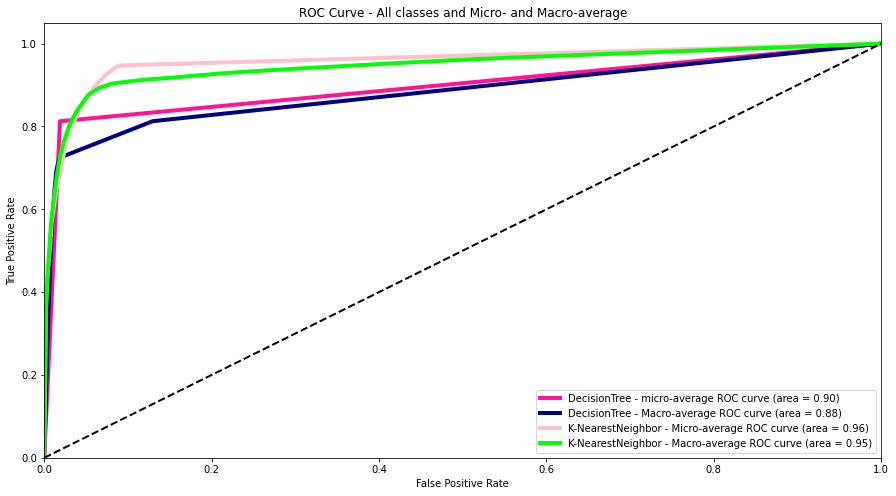

In [16]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])     
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Plot all ROC curves (all classes and micro and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (DecisionTree)
plt.plot(fpr_dt["micro"], tpr_dt["micro"],
         label='DecisionTree - micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["micro"]),
         color='deeppink', linestyle='-', linewidth=4)

# Plot macro curve (DecisionTree)
plt.plot(fpr_dt["macro"], tpr_dt["macro"],
         label='DecisionTree - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["macro"]),
         color='navy', linestyle='-', linewidth=4)

# Plot micro curve (K-NearestNeighbor)
plt.plot(fpr_knn["micro"], tpr_knn["micro"],
         label='K-NearestNeighbor - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["micro"]),
         color='pink', linestyle='-', linewidth=4)

# Plot macro curve (K-NearestNeighbor)
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='K-NearestNeighbor - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All classes and Micro- and Macro-average')
plt.legend(loc="lower right")
plt.show()

## Test plotting four different classifiers

<ipython-input-49-4b44df6f3a10>:69: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-49-4b44df6f3a10>:74: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-49-4b44df6f3a10>:79: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-49-4b44df6f3a10>:84: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])


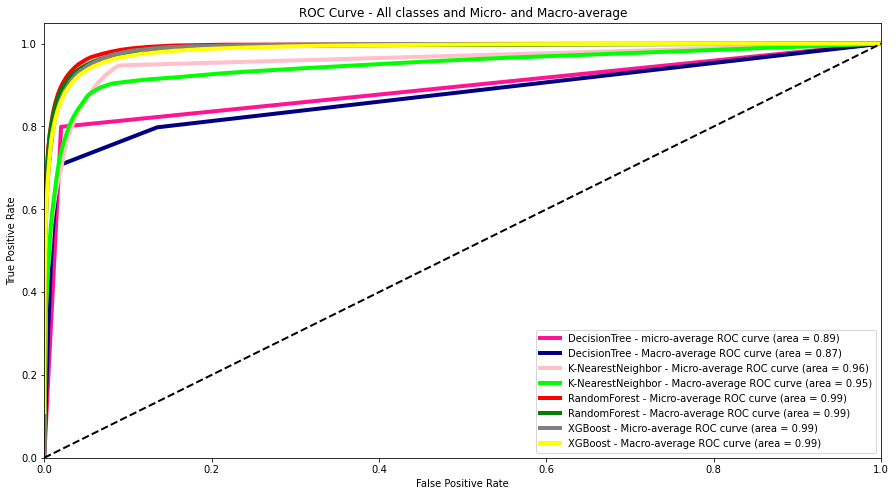

In [49]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Plot all ROC curves (all classes and micro and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (DecisionTree)
plt.plot(fpr_dt["micro"], tpr_dt["micro"],
         label='DecisionTree - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["micro"]),
         color='deeppink', linestyle='-', linewidth=4)

# Plot macro curve (DecisionTree)
plt.plot(fpr_dt["macro"], tpr_dt["macro"],
         label='DecisionTree - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["macro"]),
         color='navy', linestyle='-', linewidth=4)

# Plot micro curve (K-NearestNeighbor)
plt.plot(fpr_knn["micro"], tpr_knn["micro"],
         label='K-NearestNeighbor - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["micro"]),
         color='pink', linestyle='-', linewidth=4)

# Plot macro curve (K-NearestNeighbor)
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='K-NearestNeighbor - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot micro curve (RandomForest)
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label='RandomForest - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["micro"]),
         color='red', linestyle='-', linewidth=4)

# Plot macro curve (RandomForest)
plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='RandomForest - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='green', linestyle='-', linewidth=4)

# Plot micro curve (XGBoost)
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label='XGBoost - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["micro"]),
         color='gray', linestyle='-', linewidth=4)

# Plot macro curve (XGBoost)
plt.plot(fpr_xgb["macro"], tpr_xgb["macro"],
         label='XGBoost - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["macro"]),
         color='yellow', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All classes and Micro- and Macro-average')
plt.legend(loc="lower right")
plt.show()

# ROC curve - Micro average

## With "mets" feature

## First trial

<ipython-input-115-15cd00dfec7a>:84: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-115-15cd00dfec7a>:89: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-115-15cd00dfec7a>:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-115-15cd00dfec7a>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-115-15cd00dfec7a>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st

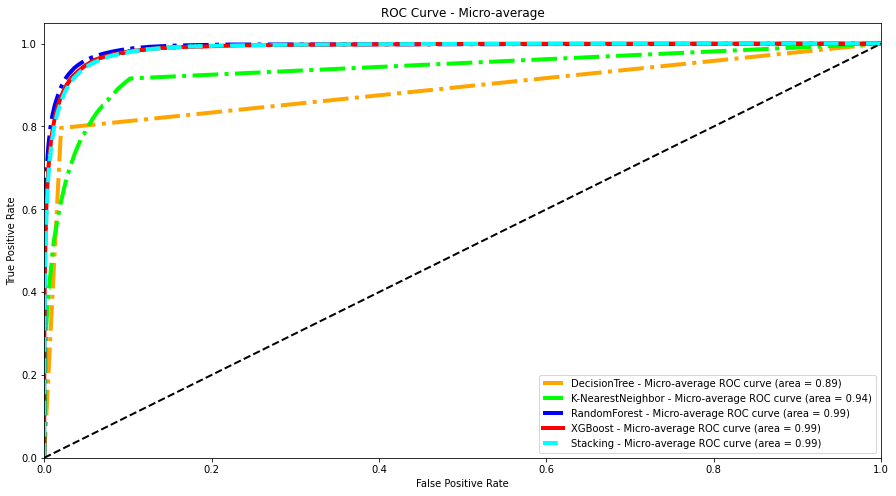

In [115]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Plot ROC curves ((all classes) and micro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (DecisionTree)
plt.plot(fpr_dt["micro"], tpr_dt["micro"],
         label='DecisionTree - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["micro"]),
         color='orange', linestyle='-.', linewidth=4)

# Plot micro curve (K-NearestNeighbor)
plt.plot(fpr_knn["micro"], tpr_knn["micro"],
         label='K-NearestNeighbor - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["micro"]),
         color='lime', linestyle='-.', linewidth=4)

# Plot micro curve (RandomForest)
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label='RandomForest - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["micro"]),
         color='blue', linestyle='-.', linewidth=4)

# Plot micro curve (XGBoost)
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label='XGBoost - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["micro"]),
         color='red', linestyle='-', linewidth=4)

# Plot micro curve (Stacking)
plt.plot(fpr_st["micro"], tpr_st["micro"],
         label='Stacking - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["micro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Micro-average')
plt.legend(loc="lower right")
plt.show()

## Second trial

<ipython-input-20-45a176be5d77>:84: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-20-45a176be5d77>:89: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-20-45a176be5d77>:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-20-45a176be5d77>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-20-45a176be5d77>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, fpr

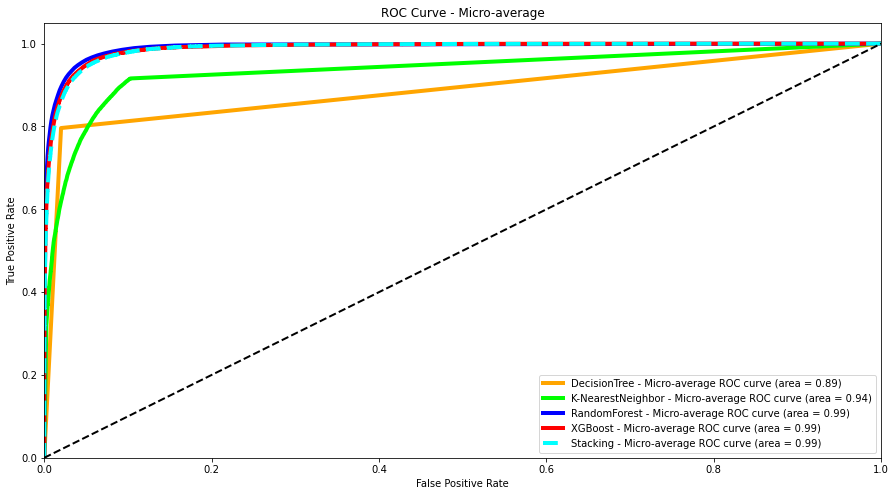

In [20]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Plot ROC curves ((all classes) and micro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (DecisionTree)
plt.plot(fpr_dt["micro"], tpr_dt["micro"],
         label='DecisionTree - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["micro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot micro curve (K-NearestNeighbor)
plt.plot(fpr_knn["micro"], tpr_knn["micro"],
         label='K-NearestNeighbor - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["micro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot micro curve (RandomForest)
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label='RandomForest - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["micro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot micro curve (XGBoost)
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label='XGBoost - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["micro"]),
         color='red', linestyle='-', linewidth=4)

# Plot micro curve (Stacking)
plt.plot(fpr_st["micro"], tpr_st["micro"],
         label='Stacking - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["micro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Micro-average')
plt.legend(loc="lower right")
plt.show()

## Third trial

<ipython-input-38-95b109f9f7e8>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-38-95b109f9f7e8>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-38-95b109f9f7e8>:109: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-38-95b109f9f7e8>:114: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-38-95b109f9f7e8>:119: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, 

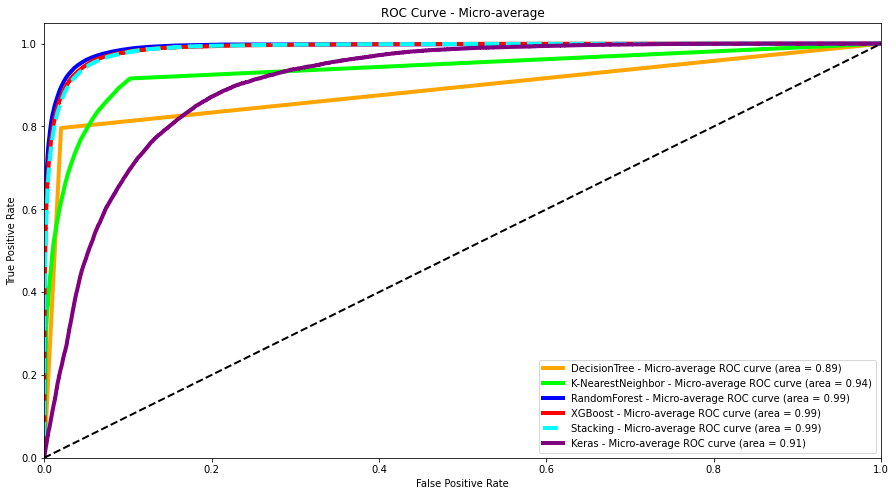

In [38]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        

# Compute ROC curve and ROC area for each class (Keras)    
fpr_km = dict()
tpr_km = dict()
roc_auc_km = dict()
for i in range(n_classes):
    fpr_km[i], tpr_km[i], _ = roc_curve(y_test_new_km[:, i], km_y_score[:, i])
    roc_auc_km[i] = auc(fpr_km[i], tpr_km[i])            
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# Compute micro-average ROC curve and ROC area (Keras)
fpr_km["micro"], tpr_km["micro"], _ = roc_curve(y_test_new_km.ravel(), km_y_score.ravel())
roc_auc_km["micro"] = auc(fpr_km["micro"], tpr_km["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Keras)
all_fpr_km = np.unique(np.concatenate([fpr_km[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      

# Then interpolate all ROC curves at this points (Keras)
mean_tpr_km = np.zeros_like(all_fpr_km)
for i in range(n_classes):
    mean_tpr_km += interp(all_fpr_km, fpr_km[i], tpr_km[i])
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Finally average it and compute AUC (Keras)
mean_tpr_km /= n_classes

fpr_km["macro"] = all_fpr_km
tpr_km["macro"] = mean_tpr_km
roc_auc_km["macro"] = auc(fpr_km["macro"], tpr_km["macro"])

# Plot ROC curves ((all classes) and micro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (DecisionTree)
plt.plot(fpr_dt["micro"], tpr_dt["micro"],
         label='DecisionTree - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["micro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot micro curve (K-NearestNeighbor)
plt.plot(fpr_knn["micro"], tpr_knn["micro"],
         label='K-NearestNeighbor - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["micro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot micro curve (RandomForest)
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label='RandomForest - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["micro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot micro curve (XGBoost)
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label='XGBoost - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["micro"]),
         color='red', linestyle='-', linewidth=4)

# Plot micro curve (Stacking)
plt.plot(fpr_st["micro"], tpr_st["micro"],
         label='Stacking - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["micro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot micro curve (Keras)
plt.plot(fpr_km["micro"], tpr_km["micro"],
         label='Keras - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_km["micro"]),
         color='purple', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Micro-average')
plt.legend(loc="lower right")
plt.show()

## Without "mets" feature

<ipython-input-30-95b109f9f7e8>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-30-95b109f9f7e8>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-30-95b109f9f7e8>:109: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-30-95b109f9f7e8>:114: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-30-95b109f9f7e8>:119: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, 

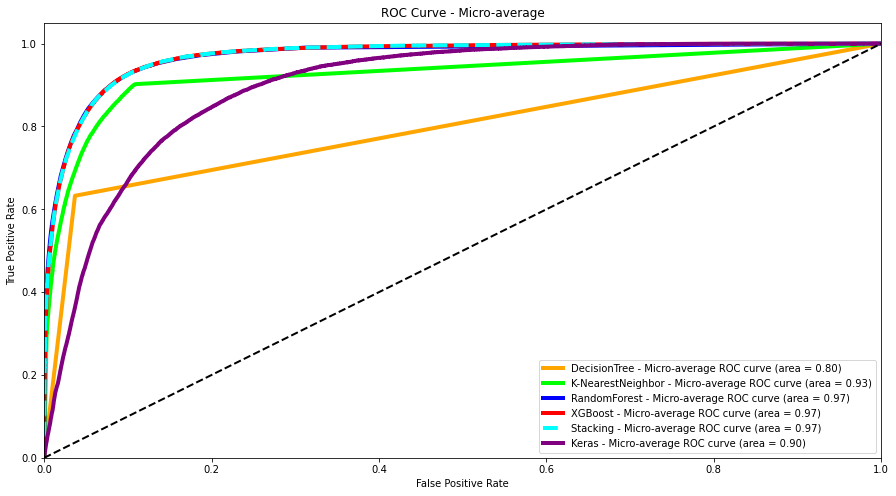

In [30]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        

# Compute ROC curve and ROC area for each class (Keras)    
fpr_km = dict()
tpr_km = dict()
roc_auc_km = dict()
for i in range(n_classes):
    fpr_km[i], tpr_km[i], _ = roc_curve(y_test_new_km[:, i], km_y_score[:, i])
    roc_auc_km[i] = auc(fpr_km[i], tpr_km[i])            
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# Compute micro-average ROC curve and ROC area (Keras)
fpr_km["micro"], tpr_km["micro"], _ = roc_curve(y_test_new_km.ravel(), km_y_score.ravel())
roc_auc_km["micro"] = auc(fpr_km["micro"], tpr_km["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Keras)
all_fpr_km = np.unique(np.concatenate([fpr_km[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      

# Then interpolate all ROC curves at this points (Keras)
mean_tpr_km = np.zeros_like(all_fpr_km)
for i in range(n_classes):
    mean_tpr_km += interp(all_fpr_km, fpr_km[i], tpr_km[i])
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Finally average it and compute AUC (Keras)
mean_tpr_km /= n_classes

fpr_km["macro"] = all_fpr_km
tpr_km["macro"] = mean_tpr_km
roc_auc_km["macro"] = auc(fpr_km["macro"], tpr_km["macro"])

# Plot ROC curves ((all classes) and micro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot micro curve (DecisionTree)
plt.plot(fpr_dt["micro"], tpr_dt["micro"],
         label='DecisionTree - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["micro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot micro curve (K-NearestNeighbor)
plt.plot(fpr_knn["micro"], tpr_knn["micro"],
         label='K-NearestNeighbor - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["micro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot micro curve (RandomForest)
plt.plot(fpr_rf["micro"], tpr_rf["micro"],
         label='RandomForest - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["micro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot micro curve (XGBoost)
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"],
         label='XGBoost - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["micro"]),
         color='red', linestyle='-', linewidth=4)

# Plot micro curve (Stacking)
plt.plot(fpr_st["micro"], tpr_st["micro"],
         label='Stacking - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["micro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot micro curve (Keras)
plt.plot(fpr_km["micro"], tpr_km["micro"],
         label='Keras - Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_km["micro"]),
         color='purple', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Micro-average')
plt.legend(loc="lower right")
plt.show()

# ROC curve - Macro average

## With "mets" feature

## First trial

<ipython-input-114-377ba4ea2028>:84: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-114-377ba4ea2028>:89: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-114-377ba4ea2028>:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-114-377ba4ea2028>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-114-377ba4ea2028>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st

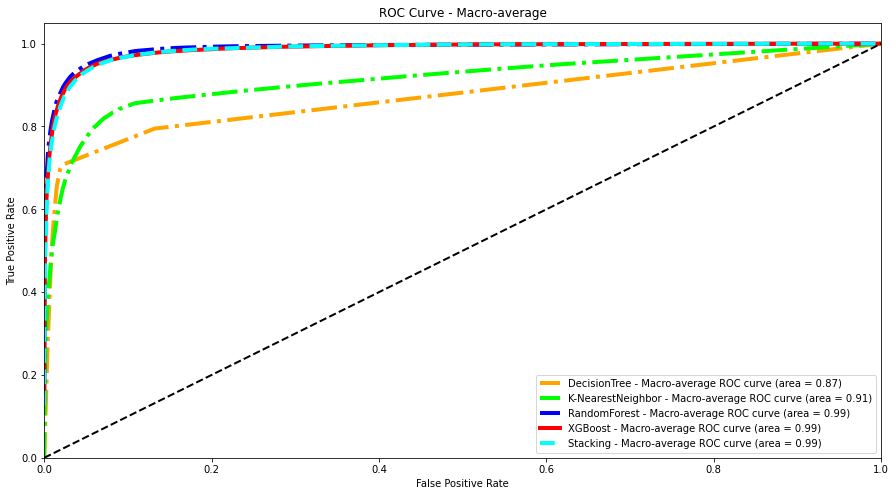

In [114]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Plot ROC curves ((all classes) and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot macro curve (DecisionTree)
plt.plot(fpr_dt["macro"], tpr_dt["macro"],
         label='DecisionTree - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["macro"]),
         color='orange', linestyle='-.', linewidth=4)

# Plot macro curve (K-NearestNeighbor)
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='K-NearestNeighbor - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lime', linestyle='-.', linewidth=4)

# Plot macro curve (RandomForest)
plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='RandomForest - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='blue', linestyle='-.', linewidth=4)

# Plot macro curve (XGBoost)
plt.plot(fpr_xgb["macro"], tpr_xgb["macro"],
         label='XGBoost - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["macro"]),
         color='red', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_st["macro"], tpr_st["macro"],
         label='Stacking - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["macro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Macro-average')
plt.legend(loc="lower right")
plt.show()

## Second trial

<ipython-input-21-50d1e337b084>:84: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-21-50d1e337b084>:89: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-21-50d1e337b084>:94: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-21-50d1e337b084>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-21-50d1e337b084>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, fpr

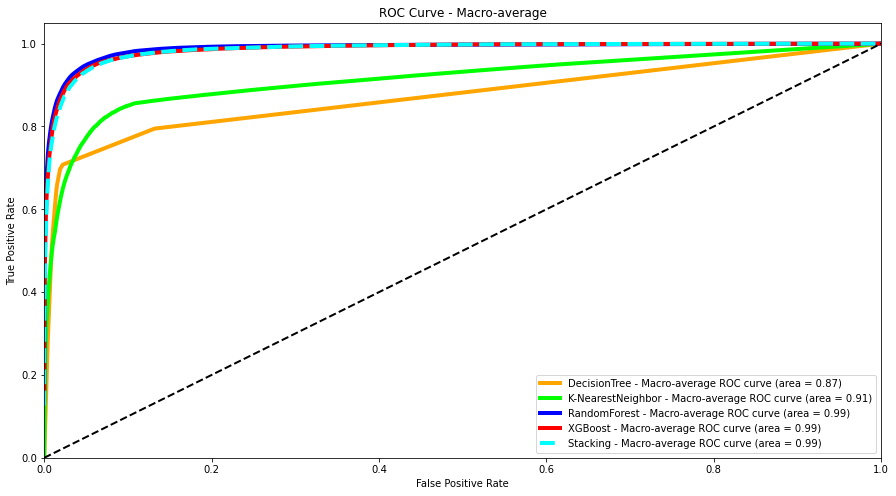

In [21]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Plot ROC curves ((all classes) and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot macro curve (DecisionTree)
plt.plot(fpr_dt["macro"], tpr_dt["macro"],
         label='DecisionTree - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["macro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot macro curve (K-NearestNeighbor)
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='K-NearestNeighbor - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot macro curve (RandomForest)
plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='RandomForest - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot macro curve (XGBoost)
plt.plot(fpr_xgb["macro"], tpr_xgb["macro"],
         label='XGBoost - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["macro"]),
         color='red', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_st["macro"], tpr_st["macro"],
         label='Stacking - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["macro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Macro-average')
plt.legend(loc="lower right")
plt.show()

## Third trial

<ipython-input-39-a1c6b2f0bb9d>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-39-a1c6b2f0bb9d>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-39-a1c6b2f0bb9d>:109: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-39-a1c6b2f0bb9d>:114: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-39-a1c6b2f0bb9d>:119: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, 

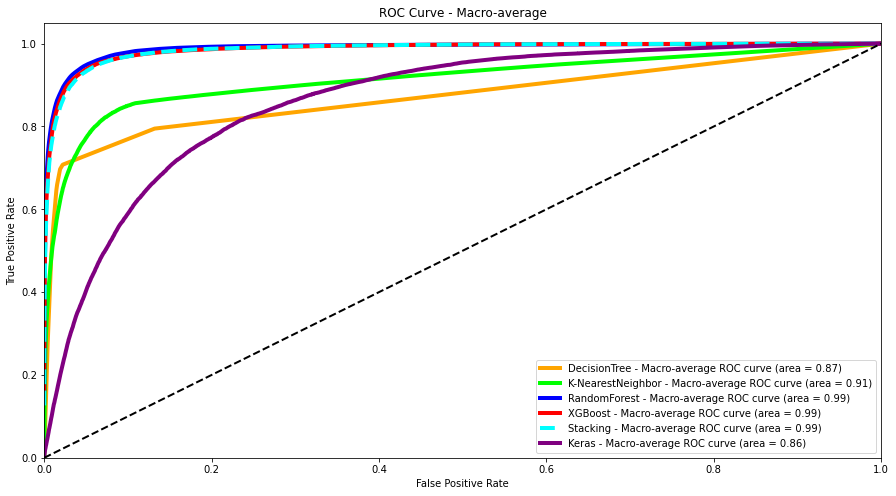

In [39]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        

# Compute ROC curve and ROC area for each class (Keras)    
fpr_km = dict()
tpr_km = dict()
roc_auc_km = dict()
for i in range(n_classes):
    fpr_km[i], tpr_km[i], _ = roc_curve(y_test_new_km[:, i], km_y_score[:, i])
    roc_auc_km[i] = auc(fpr_km[i], tpr_km[i])
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# Compute micro-average ROC curve and ROC area (Keras)
fpr_km["micro"], tpr_km["micro"], _ = roc_curve(y_test_new_km.ravel(), km_y_score.ravel())
roc_auc_km["micro"] = auc(fpr_km["micro"], tpr_km["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Keras)
all_fpr_km = np.unique(np.concatenate([fpr_km[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      
    
# Then interpolate all ROC curves at this points (Keras)
mean_tpr_km = np.zeros_like(all_fpr_km)
for i in range(n_classes):
    mean_tpr_km += interp(all_fpr_km, fpr_km[i], tpr_km[i])      
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_km /= n_classes

fpr_km["macro"] = all_fpr_km
tpr_km["macro"] = mean_tpr_km
roc_auc_km["macro"] = auc(fpr_km["macro"], tpr_km["macro"])

# Plot ROC curves ((all classes) and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot macro curve (DecisionTree)
plt.plot(fpr_dt["macro"], tpr_dt["macro"],
         label='DecisionTree - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["macro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot macro curve (K-NearestNeighbor)
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='K-NearestNeighbor - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot macro curve (RandomForest)
plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='RandomForest - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot macro curve (XGBoost)
plt.plot(fpr_xgb["macro"], tpr_xgb["macro"],
         label='XGBoost - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["macro"]),
         color='red', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_st["macro"], tpr_st["macro"],
         label='Stacking - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["macro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot macro curve (Keras)
plt.plot(fpr_km["macro"], tpr_km["macro"],
         label='Keras - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_km["macro"]),
         color='purple', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Macro-average')
plt.legend(loc="lower right")
plt.show()

## Without "mets" feature

<ipython-input-31-a1c6b2f0bb9d>:99: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])
<ipython-input-31-a1c6b2f0bb9d>:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])
<ipython-input-31-a1c6b2f0bb9d>:109: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
<ipython-input-31-a1c6b2f0bb9d>:114: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])
<ipython-input-31-a1c6b2f0bb9d>:119: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr_st += interp(all_fpr_st, 

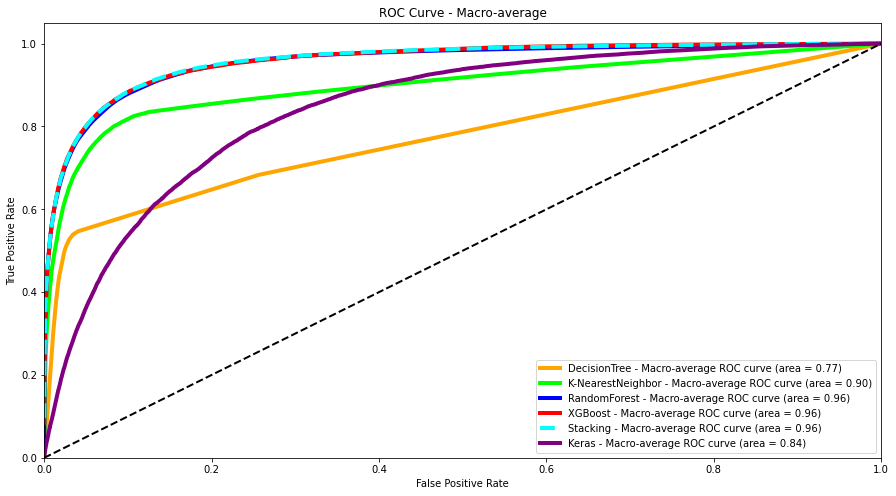

In [31]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
from scipy import interp

# Compute ROC curve and ROC area for each class (DecisionTree)
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_new_dt[:, i], dt_y_score[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Compute ROC curve and ROC area for each class (K-NearestNeighbor)    
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_new_knn[:, i], knn_y_score[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
# Compute ROC curve and ROC area for each class (RandomForest)    
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_new_rf[:, i], rf_y_score[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class (XGBoost)    
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_new_xgb[:, i], xgb_y_score[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])    

# Compute ROC curve and ROC area for each class (Stacking)    
fpr_st = dict()
tpr_st = dict()
roc_auc_st = dict()
for i in range(n_classes):
    fpr_st[i], tpr_st[i], _ = roc_curve(y_test_new_st[:, i], st_y_score[:, i])
    roc_auc_st[i] = auc(fpr_st[i], tpr_st[i])        

# Compute ROC curve and ROC area for each class (Keras)    
fpr_km = dict()
tpr_km = dict()
roc_auc_km = dict()
for i in range(n_classes):
    fpr_km[i], tpr_km[i], _ = roc_curve(y_test_new_km[:, i], km_y_score[:, i])
    roc_auc_km[i] = auc(fpr_km[i], tpr_km[i])
    
# Compute micro-average ROC curve and ROC area (DecisionTree)
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_new_dt.ravel(), dt_y_score.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

# Compute micro-average ROC curve and ROC area (K-NearestNeighbor)
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_new_knn.ravel(), knn_y_score.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])

# Compute micro-average ROC curve and ROC area (RandomForest)
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_new_rf.ravel(), rf_y_score.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Compute micro-average ROC curve and ROC area (XGBoost)
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test_new_xgb.ravel(), xgb_y_score.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

# Compute micro-average ROC curve and ROC area (Stacking)
fpr_st["micro"], tpr_st["micro"], _ = roc_curve(y_test_new_st.ravel(), st_y_score.ravel())
roc_auc_st["micro"] = auc(fpr_st["micro"], tpr_st["micro"])

# Compute micro-average ROC curve and ROC area (Keras)
fpr_km["micro"], tpr_km["micro"], _ = roc_curve(y_test_new_km.ravel(), km_y_score.ravel())
roc_auc_km["micro"] = auc(fpr_km["micro"], tpr_km["micro"])

# First aggregate all false positive rates (DecisionTree)
all_fpr_dt = np.unique(np.concatenate([fpr_dt[i] for i in range(n_classes)]))

# First aggregate all false positive rates (K-NearestNeighbor)
all_fpr_knn = np.unique(np.concatenate([fpr_knn[i] for i in range(n_classes)]))

# First aggregate all false positive rates (RandomForest)
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(n_classes)]))

# First aggregate all false positive rates (XGBoost)
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Stacking)
all_fpr_st = np.unique(np.concatenate([fpr_st[i] for i in range(n_classes)]))

# First aggregate all false positive rates (Keras)
all_fpr_km = np.unique(np.concatenate([fpr_km[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points (DecisionTree)
mean_tpr_dt = np.zeros_like(all_fpr_dt)
for i in range(n_classes):
    mean_tpr_dt += interp(all_fpr_dt, fpr_dt[i], tpr_dt[i])

# Then interpolate all ROC curves at this points (K-NearestNeighbor)
mean_tpr_knn = np.zeros_like(all_fpr_knn)
for i in range(n_classes):
    mean_tpr_knn += interp(all_fpr_knn, fpr_knn[i], tpr_knn[i])    

# Then interpolate all ROC curves at this points (RandomForest)
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(n_classes):
    mean_tpr_rf += interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])      

# Then interpolate all ROC curves at this points (XGBoost)
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])  

# Then interpolate all ROC curves at this points (Stacking)
mean_tpr_st = np.zeros_like(all_fpr_st)
for i in range(n_classes):
    mean_tpr_st += interp(all_fpr_st, fpr_st[i], tpr_st[i])      
    
# Then interpolate all ROC curves at this points (Keras)
mean_tpr_km = np.zeros_like(all_fpr_km)
for i in range(n_classes):
    mean_tpr_km += interp(all_fpr_km, fpr_km[i], tpr_km[i])      
    
# Finally average it and compute AUC (DecisionTree)
mean_tpr_dt /= n_classes

fpr_dt["macro"] = all_fpr_dt
tpr_dt["macro"] = mean_tpr_dt
roc_auc_dt["macro"] = auc(fpr_dt["macro"], tpr_dt["macro"])

# Finally average it and compute AUC (K-NearestNeighbor)
mean_tpr_knn /= n_classes

fpr_knn["macro"] = all_fpr_knn
tpr_knn["macro"] = mean_tpr_knn
roc_auc_knn["macro"] = auc(fpr_knn["macro"], tpr_knn["macro"])

# Finally average it and compute AUC (RandomForest)
mean_tpr_rf /= n_classes

fpr_rf["macro"] = all_fpr_rf
tpr_rf["macro"] = mean_tpr_rf
roc_auc_rf["macro"] = auc(fpr_rf["macro"], tpr_rf["macro"])

# Finally average it and compute AUC (XGBoost)
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_st /= n_classes

fpr_st["macro"] = all_fpr_st
tpr_st["macro"] = mean_tpr_st
roc_auc_st["macro"] = auc(fpr_st["macro"], tpr_st["macro"])

# Finally average it and compute AUC (Stacking)
mean_tpr_km /= n_classes

fpr_km["macro"] = all_fpr_km
tpr_km["macro"] = mean_tpr_km
roc_auc_km["macro"] = auc(fpr_km["macro"], tpr_km["macro"])

# Plot ROC curves ((all classes) and macro for all classifiers)
plt.figure(figsize=(15, 8))

# Plot macro curve (DecisionTree)
plt.plot(fpr_dt["macro"], tpr_dt["macro"],
         label='DecisionTree - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_dt["macro"]),
         color='orange', linestyle='-', linewidth=4)

# Plot macro curve (K-NearestNeighbor)
plt.plot(fpr_knn["macro"], tpr_knn["macro"],
         label='K-NearestNeighbor - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_knn["macro"]),
         color='lime', linestyle='-', linewidth=4)

# Plot macro curve (RandomForest)
plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label='RandomForest - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rf["macro"]),
         color='blue', linestyle='-', linewidth=4)

# Plot macro curve (XGBoost)
plt.plot(fpr_xgb["macro"], tpr_xgb["macro"],
         label='XGBoost - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_xgb["macro"]),
         color='red', linestyle='-', linewidth=4)

# Plot macro curve (Stacking)
plt.plot(fpr_st["macro"], tpr_st["macro"],
         label='Stacking - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_st["macro"]),
         color='aqua', linestyle='--', linewidth=4)

# Plot macro curve (Keras)
plt.plot(fpr_km["macro"], tpr_km["macro"],
         label='Keras - Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_km["macro"]),
         color='purple', linestyle='-', linewidth=4)

# Plot all class curves
lw = 2
#colors = cycle(['red', 'yellow', 'blue', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lightblue', 'brown', 'lime'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                label='ROC curve of class {0} (area = {1:0.2f})'
#                ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Macro-average')
plt.legend(loc="lower right")
plt.show()

# Barchart

## With "mets" feature

## Test with two classifiers

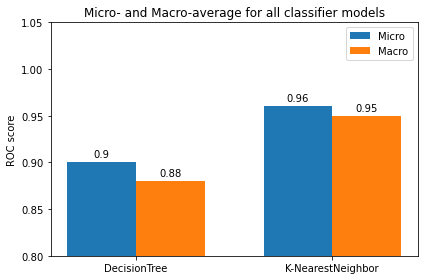

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['DecisionTree', 'K-NearestNeighbor']
micro = [round(roc_auc_dt["micro"], 2), round(roc_auc_knn["micro"], 2)]
macro = [round(roc_auc_dt["macro"], 2), round(roc_auc_knn["macro"], 2)]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, micro, width, label='Micro')
rects2 = ax.bar(x + width/2, macro, width, label='Macro')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC score') 
ax.set_title('Micro- and Macro-average for all classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0.8, 1.05])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Test with four different classifiers

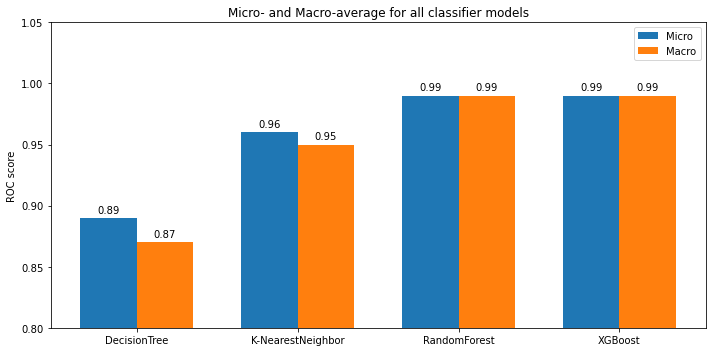

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['DecisionTree', 'K-NearestNeighbor', 'RandomForest', 'XGBoost']
micro = [round(roc_auc_dt["micro"], 2), round(roc_auc_knn["micro"], 2), round(roc_auc_rf["micro"], 2), round(roc_auc_xgb["micro"], 2)]
macro = [round(roc_auc_dt["macro"], 2), round(roc_auc_knn["macro"], 2), round(roc_auc_rf["macro"], 2), round(roc_auc_xgb["macro"], 2)]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, micro, width, label='Micro')
rects2 = ax.bar(x + width/2, macro, width, label='Macro')

# Adjust height and width of figure
fig.set_figheight(5)
fig.set_figwidth(10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC score') # change ROC to AUC
ax.set_title('Micro- and Macro-average for all classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0.8, 1.05])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Five classifiers

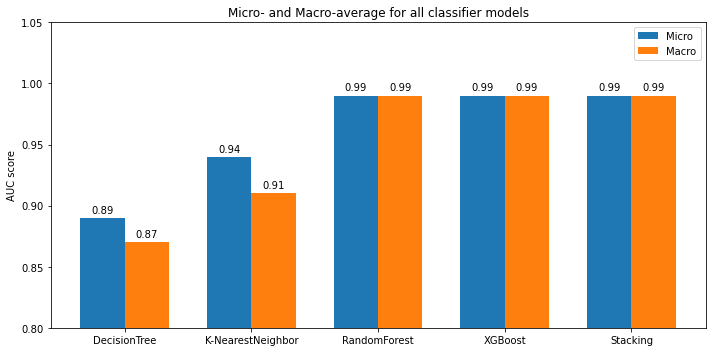

In [117]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['DecisionTree', 'K-NearestNeighbor', 'RandomForest', 'XGBoost', 'Stacking']
micro = [round(roc_auc_dt["micro"], 2), round(roc_auc_knn["micro"], 2), round(roc_auc_rf["micro"], 2), round(roc_auc_xgb["micro"], 2), round(roc_auc_st["micro"], 2)]
macro = [round(roc_auc_dt["macro"], 2), round(roc_auc_knn["macro"], 2), round(roc_auc_rf["macro"], 2), round(roc_auc_xgb["macro"], 2), round(roc_auc_st["macro"], 2)]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, micro, width, label='Micro')
rects2 = ax.bar(x + width/2, macro, width, label='Macro')

# Adjust height and width of figure
fig.set_figheight(5)
fig.set_figwidth(10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC score')
ax.set_title('Micro- and Macro-average for all classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0.8, 1.05])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## All models

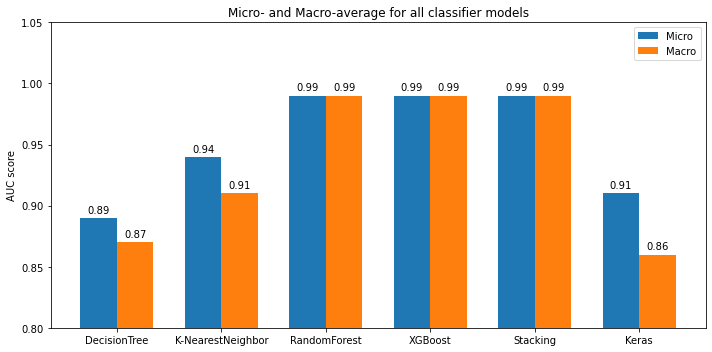

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['DecisionTree', 'K-NearestNeighbor', 'RandomForest', 'XGBoost', 'Stacking', 'Keras']
micro = [round(roc_auc_dt["micro"], 2), round(roc_auc_knn["micro"], 2), round(roc_auc_rf["micro"], 2), round(roc_auc_xgb["micro"], 2), round(roc_auc_st["micro"], 2), round(roc_auc_km["micro"], 2)]
macro = [round(roc_auc_dt["macro"], 2), round(roc_auc_knn["macro"], 2), round(roc_auc_rf["macro"], 2), round(roc_auc_xgb["macro"], 2), round(roc_auc_st["macro"], 2), round(roc_auc_km["macro"], 2)]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, micro, width, label='Micro')
rects2 = ax.bar(x + width/2, macro, width, label='Macro')

# Adjust height and width of figure
fig.set_figheight(5)
fig.set_figwidth(10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC score')
ax.set_title('Micro- and Macro-average for all classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0.8, 1.05])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Without "mets" feature

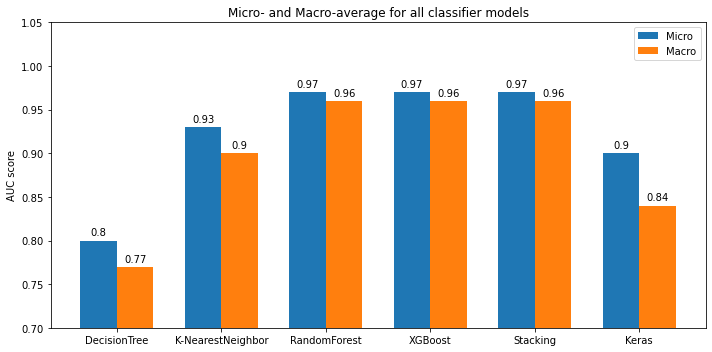

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['DecisionTree', 'K-NearestNeighbor', 'RandomForest', 'XGBoost', 'Stacking', 'Keras']
micro = [round(roc_auc_dt["micro"], 2), round(roc_auc_knn["micro"], 2), round(roc_auc_rf["micro"], 2), round(roc_auc_xgb["micro"], 2), round(roc_auc_st["micro"], 2), round(roc_auc_km["micro"], 2)]
macro = [round(roc_auc_dt["macro"], 2), round(roc_auc_knn["macro"], 2), round(roc_auc_rf["macro"], 2), round(roc_auc_xgb["macro"], 2), round(roc_auc_st["macro"], 2), round(roc_auc_km["macro"], 2)]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, micro, width, label='Micro')
rects2 = ax.bar(x + width/2, macro, width, label='Macro')

# Adjust height and width of figure
fig.set_figheight(5)
fig.set_figwidth(10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC score')
ax.set_title('Micro- and Macro-average for all classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0.7, 1.05])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Table - Training dataset results

## Precision

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||Stacking||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||1.00||1.00||1.00||0.99||1.00||0.89|
|Class 2||1.00||1.00||1.00||0.98||1.00||0.83|
|Class 3||1.00||1.00||1.00||0.97||1.00||0.89|
|Class 4||1.00||1.00||1.00||0.95||1.00||0.86|
|Class 5||1.00||1.00||1.00||0.94||1.00||0.88|
|Class 6||1.00||1.00||1.00||0.96||1.00||0.86|
|Class 7||1.00||1.00||1.00||0.97||1.00||0.91|
|Class 8||1.00||1.00||1.00||0.96||1.00||0.90|
|Class 9||1.00||1.00||1.00||0.96||1.00||0.88|
|Class 10||1.00||1.00||1.00||0.99||1.00||0.93|
|Class 12||1.00||1.00||1.00||0.97||1.00||0.92|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy|
|Macro avg||1.00||1.00||1.00||0.97||1.00||0.89|
|Weighted avg||1.00||1.00||1.00||0.97||1.00||0.90|

## Recall

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||Stacking||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||1.00||1.00||1.00||0.97||1.00||0.89|
|Class 2||1.00||1.00||1.00||0.97||1.00||0.95|
|Class 3||1.00||1.00||1.00||0.96||1.00||0.92|
|Class 4||1.00||1.00||1.00||0.93||1.00||0.92|
|Class 5||1.00||1.00||1.00||0.97||1.00||0.86|
|Class 6||1.00||1.00||1.00||0.96||1.00||0.94|
|Class 7||1.00||1.00||1.00||0.97||1.00||0.89|
|Class 8||1.00||1.00||1.00||0.97||1.00||0.88|
|Class 9||1.00||1.00||1.00||0.95||1.00||0.91|
|Class 10||1.00||1.00||1.00||0.97||1.00||0.90|
|Class 12||1.00||1.00||1.00||0.97||1.00||0.88|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy|
|Macro avg||1.00||1.00||1.00||0.96||1.00||0.90|
|Weighted avg||1.00||1.00||1.00||0.97||1.00||0.90|

## f1-score

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||Stacking||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||1.00||1.00||1.00||0.98||1.00||0.89|
|Class 2||1.00||1.00||1.00||0.97||1.00||0.89|
|Class 3||1.00||1.00||1.00||0.97||1.00||0.90|
|Class 4||1.00||1.00||1.00||0.94||1.00||0.89|
|Class 5||1.00||1.00||1.00||0.96||1.00||0.87|
|Class 6||1.00||1.00||1.00||0.96||1.00||0.90|
|Class 7||1.00||1.00||1.00||0.97||1.00||0.90|
|Class 8||1.00||1.00||1.00||0.97||1.00||0.89|
|Class 9||1.00||1.00||1.00||0.96||1.00||0.89|
|Class 10||1.00||1.00||1.00||0.98||1.00||0.91|
|Class 12||1.00||1.00||1.00||0.97||1.00||0.90|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy||1.00||1.00||1.00||0.97||1.00||0.90|
|Macro avg||1.00||1.00||1.00||0.97||1.00||0.89|
|Weighted avg||1.00||1.00||1.00||0.97||1.00||0.90|

## Support

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||Stacking||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||6750||6750||6750||6750||6750||6692|
|Class 2||6755||6755||6755||6755||6755||6644|
|Class 3||6736||6736||6736||6736||6736||6711|
|Class 4||6722||6722||6722||6722||6722||6715|
|Class 5||6749||6749||6749||6749||6749||6733|
|Class 6||6712||6712||6712||6712||6712||6811|
|Class 7||6721||6721||6721||6721||6721||6682|
|Class 8||6724||6724||6724||6724||6724||6769|
|Class 9||4213||4213||4213||4213||4213||4198|
|Class 10||3042||3042||3042||3042||3042||3010|
|Class 12||48198||48198||48198||48198||48198||48357|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy||109322||109322||109322||109322||109322||109322|
|Macro avg||109322||109322||109322||109322||109322||109322|
|Weighted avg||109322||109322||109322||109322||109322||109322|

# Table - Test dataset results

## Precision

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||Stacking||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||0.86||0.78||0.96||0.95||0.95||0.84|
|Class 2||0.84||0.76||0.94||0.92||0.93||0.80|
|Class 3||0.86||0.77||0.92||0.91||0.92||0.85|
|Class 4||0.78||0.70||0.89||0.84||0.89||0.76|
|Class 5||0.74||0.67||0.84||0.81||0.85||0.79|
|Class 6||0.79||0.72||0.88||0.85||0.88||0.76|
|Class 7||0.68||0.66||0.81||0.82||0.82||0.74|
|Class 8||0.78||0.74||0.87||0.85||0.87||0.82|
|Class 9||0.66||0.63||0.82||0.80||0.80||0.69|
|Class 10||0.82||0.80||0.95||0.93||0.91||0.86|
|Class 12||0.83||0.76||0.85||0.86||0.89||0.85|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy|
|Macro avg||0.79||0.73||0.88||0.87||<span style="color:blue">0.88</span>||0.80|
|Weighted avg||0.80||0.74||0.87||0.86||<span style="color:blue">0.89</span>||0.82|

## Recall

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||<span style="color:blue">Stacking</span>||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||0.85||0.77||0.90||0.88||0.93||0.86|
|Class 2||0.87||0.77||0.91||0.89||0.92||0.91|
|Class 3||0.86||0.76||0.88||0.87||0.91||0.88|
|Class 4||0.78||0.76||0.82||0.79||0.85||0.84|
|Class 5||0.78||0.72||0.85||0.84||0.87||0.78|
|Class 6||0.78||0.75||0.83||0.83||0.86||0.85|
|Class 7||0.67||0.59||0.74||0.78||0.81||0.72|
|Class 8||0.77||0.76||0.84||0.85||0.86||0.81|
|Class 9||0.64||0.51||0.70||0.73||0.77||0.68|
|Class 10||0.80||0.65||0.84||0.82||0.89||0.82|
|Class 12||0.83||0.78||0.91||0.90||0.91||0.81|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy|
|Macro avg||0.78||0.71||0.84||0.84||<span style="color:blue">0.87</span>||0.82|
|Weighted avg||0.80||0.74||0.87||0.86||<span style="color:blue">0.89</span>||0.82|

## f1-score

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||<span style="color:blue">Stacking</span>||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||0.85||0.77||0.93||0.92||0.94||0.85|
|Class 2||0.85||0.77||0.92||0.91||0.93||0.85|
|Class 3||0.86||0.76||0.90||0.89||0.91||0.86|
|Class 4||0.78||0.73||0.85||0.81||0.87||0.80|
|Class 5||0.76||0.70||0.84||0.82||0.86||0.79|
|Class 6||0.79||0.73||0.85||0.84||0.87||0.80|
|Class 7||0.68||0.62||0.77||0.80||0.82||0.73|
|Class 8||0.77||0.75||0.86||0.85||0.86||0.81|
|Class 9||0.65||0.56||0.75||0.76||0.79||0.69|
|Class 10||0.81||0.72||0.89||0.87||0.90||0.84|
|Class 12||0.83||0.77||0.88||0.88||0.90||0.83|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy||0.80||0.74||0.87||0.86||<span style="color:blue">0.89</span>||0.82|
|Macro avg||0.79||0.72||0.86||0.85||<span style="color:blue">0.88</span>||0.80|
|Weighted avg||0.80||0.74||0.87||0.86||<span style="color:blue">0.89</span>||0.82|

## Support

|Classes||DecisionTree||K-NearestNeighbor||RandomForest||XGBoost||Stacking||Keras|
|-------||------------||-----------------||------------||-------||--------||-----|
|Class 1||1650||1650||1650||1650||1650||1708|
|Class 2||1645||1645||1645||1645||1645||1756|
|Class 3||1664||1664||1664||1664||1664||1689|
|Class 4||1678||1678||1678||1678||1678||1685|
|Class 5||1651||1651||1651||1651||1651||1667|
|Class 6||1688||1688||1688||1688||1688||1589|
|Class 7||1679||1679||1679||1679||1679||1718|
|Class 8||1676||1676||1676||1676||1676||1631|
|Class 9||1067||1067||1067||1067||1067||1082|
|Class 10||751||751||751||751||751||783|
|Class 12||12182||12182||12182||12182||12182||12023|
|-------||------------||-----------------||------------||-------||--------||-----|
|Accuracy||27331||27331||27331||27331||27331||27331|
|Macro avg||27331||27331||27331||27331||27331||27331|
|Weighted avg||27331||27331||27331||27331||27331||27331|

In [ ]:
# to do list

1. plot confusion matrix, tables for each classes and classifiers (f1-score, recall...etc)
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
2. divide curve plot into two plots (ROC curve)
3. finish stackingclassifier
4. decide votingclassifier or keras model

In [ ]:
# to do list
change roc curve linestyles
upload files to github, nextcloud or onedrive
add more layers to keras model, gridsearch